### UW-Madison: CS 524 &mdash; Introduction to Optimization &mdash; Spring 2020 ###

# Tournament Scheduler #

---
#### Diwanshu Jain (diwanshu@cs.wisc.edu)

*****

### Table of Contents

1. [Introduction](#1.-Introduction)
1. [Tournament Rules](#2.-Tournament-Rules)
    1. [Double Round Robin](#2.A.-Double-Round-Robin)
    1. [Single Round Robin](#2.B.-Single-Round-Robin)
1. [Mathematical Model - A Greedy Approach](#3.-Mathematical-Model-:-A-Greedy-Approach)
    1. [Double Round Robin](#3.A.-Double-Round-Robin)
    1. [Single Round Robin](#3.B.-Single-Round-Robin)
1. [Mathematical Model - Joint Optimization Approach](#4.-Mathematical-Model-:-Joint-Optimization-Approach)
    1. [Double Round Robin](#4.A.-Double-Round-Robin)
    1. [Single Round Robin](#4.B.-Single-Round-Robin)
    1. [Code Implementation](#4.C.-Code-Implementation)
1. [Supplementary Functions](#5.-Supplementary-Functions)
    1. [Greedy Optimization](#5.A.-Greedy-Optimization)
    1. [Joint Optimization](#5.B.-Joint-Optimization)
1. [User Input](#6.-User-Input)
    1. [Greedy Optimization](#6.A.-Greedy-Optimization)
    1. [Joint Optimization](#6.B.-Joint-Optimization)
1. [Solutions, Results and Discussion](#7.-Solutions,-Results-and-Discussion)
    1. [Why should Joint be better than Greedy?](#7.A.-Why-should-Joint-be-better-than-Greedy?)
    1. [Double Round Robin for 4 teams](#7.B.-Double-Round-Robin-for-4-teams)
        1. [Greedy Approach](#7.B.a.-Greedy-Approach)
        1. [Joint Approach](#7.B.b.-Joint-Approach)
        1. [Travel Map per team: Greedy V/s Joint](#7.B.c.-Travel-Map-per-team:-Greedy-V/s-Joint)
    1. [Single Round Robin for 6 teams](#7.C.-Single-Round-Robin-for-6-teams)
        1. [Greedy Approach](#7.C.a.-Greedy-Approach)
        1. [Joint Approach](#7.C.b.-Joint-Approach)
    1. [Performance Analysis](#7.D.-Performance-Analysis)
        1. [Greedy V/s Joint](#7.D.a.-Greedy-V/s-Joint)
        1. [How did we improve the time taken by Joint Optimization?](#7.D.b.-How-did-we-improve-the-time-taken-by-Joint-Optimization?)
    1. [Full Big 10 Greedy Solution](#7.E.-Full-Big-10-Greedy-Solution)
    
1. [Summary](#8.-Summary)
1. [Author Contributions](#9.-Author-Contributions)

[Appendix](#Appendix)

A.1. [Multiple matches per day : Greedy Algorithm (Double Round Robin)](#A.1.-Multiple-matches-per-day-:-Greedy-Algorithm-(Double-Round-Robin))<br>
A.2. [Peer Review Feedback: Cost of staying at away location : Joint Algorithm (Double Round Robin)](#A.2.-Peer-Review-Feedback:-Cost-of-staying-at-away-location-:-Joint-Algorithm-(Double-Round-Robin))

## 1. Introduction ##
Our project address the issue of scheduling a tournament of varying sizes and styles. Depending on the number of teams, which game playing method is being used, and the time frame of the tournament, this problem can take many different forms. Our model takes into account the cost of travel and aims to minimize the total cost of travel for all teams involved to create our optimal tournament schedule.

All sorts of tournament happen across the globe every year, many of which use a standard game-playing format to either help decide a winner, or for seeding in later rounds of the tournament. One of the most common and well-recognized formats used in tournaments is the round-robin tournament. This is a format in which all teams participating in the tournament play every other team once. A modification of this tournament is the double round-robin standard. This is a pretty intuitive change from the standard round-robin format, with each team playing every other team twice.
This is the format that we have begun with in our model, with plans to modify/expand to a standard round-robin. We chose the double round-robin because it offers each team to play a game at home, and a game on the road against every other team. In a real-world application, this would stop a team that is farther removed from the rest of the other participants to be forced to play all their games on the road.

Initially, the data we used was artificially generated for the concept of this project; however, the implementation of real-world data would be a simple step for real-world application. In this synthetic scenario, we assumed that each team was located in the United States and would be traveling to each respective destination via charted plane. This [resource](https://sherpareport.com/aircraft/sports-large-aircraft-charters.html) allowed us to find a metric for dollar per hour of chartered flight time *(for an airplane with the carrying capacity for a team of reasonable size ~30 people)*. With our price per hour of flight time, we simply had to find the flight time between the cities where our fictional teams were located, found [here](https://flighttime-calculator.com/). 

The cities we chose to participate in our initial double round-robin tournament were: New York City, Los Angeles, Chicago, and Dallas. With the way that we generated data for this problem, it would be a simple process to add more teams and their subsequent cost for travel between them. 

A sample of the form our data would take is below:

|  Cities (Cost/Flight)      | New York           | Chicago  | LA | Dallas |
| ------------- |-------------| -----| | |
| New York | \$0 | \$17,500 |\$51,000 |\$30,333 |
| Chicago  |\$17,500 |\$0 |\$37,500 |\$20,000 |
| LA       |\$51,000 |\$37,500 |\$0 |\$27,500 |
| Dallas   |\$30,333 |\$20,000 |\$27,500 |\$0 |






## 2. Tournament Rules 

In these type of tournaments, the matches can be classified in two types:


*   Home Matches: If a team $t_1$ plays a match at its home city $h(t_1)$, then it is considered to be home match of team $t_1$. 
*   Away Matches : If a team $t_2$ plays a match at a city other than its home city $h(t_2)$ (for instance, say at city $h(t_1)$), then it is considered to be a away match of team $t_2$.


### 2.A. Double Round Robin

Following are the general rules of a double round robin based tournament:
1. Each team must play each other twice in the whole tournament - once at its home city and once at away city which is the home of the opponent.<br> 
For e.g., Consider two teams' - $t_1$ and $t_2$ matchups. A match must occur at home of $t_1$: $h(t_1)$ and other at home of $t_2$: $h(t_2)$.
2. A team can not play more than 2 consecutive matches, either at home or away cities. <br>
For e.g., If a team $t_1$ plays consecutive matches at day 3 and day 4, it can not play any match on day 5. 
3. Every team is at its home city at the start of the tournament. So, $t_i$ is at $h(t_i),\,\,\,\forall i$. 

### 2.B. Single Round Robin

Following are the general rules of a single round robin based tournament (Notice that only Rule#1 changes):
1. Each team must play each other only once in the whole tournament - either at its home city or at a away city which is the home of the opponent.<br> 
For e.g., Consider two teams' - $t_1$ and $t_2$ matchups. The matchup between these two teams must occur either at home of $t_1$: $h(t_1)$ or at home of $t_2$: $h(t_2)$.
2. A team can not play more than 2 consecutive matches, either at home or away cities. <br>
For e.g., If a team $t_1$ plays consecutive matches at day 3 and day 4, it can not play any match on day 5. 
3. Every team is at its home city at the start of the tournament. So, $t_i$ is at $h(t_i),\,\,\,\forall i$. 


## 3. Mathematical Model : A Greedy Approach

The Greedy approach is called as such because, we look at the best (*lowest cost*) possible matchup on any given day, without worrying about the cost incurred due to possible future travel.<br>
Therefore the solution obtained may differ run to run and may not represent the global minima but rather a local minima instead.<br>
> After every *Optimization* call, we store the selected matchup(s) as a constraint, so that every subsequent calls for optimization takes care to ensure the previous matchups are not altered.<br>
Optimization is performed for everyday of the tournament to choose the best matchup.

Performing the optimization in such a manner greatly improves the speed of computation while ensuring the solution does not differ greatly from the *Joint Optimization*


### 3.A. Double Round Robin

As discussed in the introduction, a double round-robin is the scheduling format in which each team plays every other team twice. For this example, this would mean each team would have a home game and an away game against every other team participating in the tournament. 

---


---


#### Decision Variables
The decision variables are binary decision variables ($x_{i, j, k} \in \{0,1\}$) in terms of $i$, $j$, and $k$ in which $i$ and $j$ represent the teams. In this case, it is assumed that *Team* $i$ plays *Team* $j$ at $j's$ home on the $k^{th}$ day. \\
\begin{cases}
  x_{i, j, k}= 1 & \text{if match occur}\\    
  x_{i, j, k} = 0 & \text{otherwise}
\end{cases}
> Let there be $N$ teams. Then, number of matches to be played are $M = N(N-1)$. Hence, total number of binary variables = $N*N*M$ = $\mathcal{O}(N^4)$.
#### Parameters:

---


Cost of travelling incurred by *Team* $i$ travelling to *location* $j$ (not necessarily from *location* $i$) on the $k^{th}$ day. Let it be denoted by $C_{i, j, k}$. This is where the data from the example table shown in the introduction will come into effect.

#### The Constraints:

---



1.   Each decision variable is binary, meaning each variable: $ x_{i,j,k} \in [0,1]$
2.   There must be only one game every day

3.   There must only be a maximum of 2 consecutive matches, as to allow teams to rest 

4.   Each matchup can only happen once, no matches between teams can be repeated.
> This is because each $x_{i, j, k}$ represents a unique match. \\
> $x_{i, j, k}$ and $x_{j, i, k}$ denotes two unique matches: In both cases, *Team* $i$ plays *Team* $j$ on *day* $k$, but former match is played at Location j, while later is played at Location *i*. \\
> From *Team* $i's$ perspective, $x_{i, j, k}$ represents **away match** and $x_{j, i, k}$ represents **home match** against *Team* $j$. 
5.   Team cannot play a game against themselves (i.e. $x_{i,i,k}$ does not exist)
6.   No teams can play consecutively against each other.
7.   A match must be played on the first day
8.   All variables must be integers.

##### Intuition for the need for $C_{j,j,k}$

Let us consider 4 teams as shown in the introduction above, in our implementation of "*Tournament Scheduling*" the team that is travelling does not go back to home location if there is no need for it, therefore the cost of scheduling a match is dependent on a teams current location, and not on the cost of travelling from home location

**Starting locations for 4 teams with cost of travel between cities**

|  Cities (Cost/Flight)      | New York           | Chicago  | LA | Dallas |
| ------------- |-------------| -----| | |
| New York | \$0 | \$17,500 |\$51,000 |\$30,333 |
| Chicago  |\$17,500 |\$0 |\$37,500 |\$20,000 |
| LA       |\$51,000 |\$37,500 |\$0 |\$27,500 |
| Dallas   |\$30,333 |\$20,000 |\$27,500 |\$0 |

Let us assume after 2 days of the tournament, on Day 1, NY has played Chicago at Chicago and on Day 2 LA has played Dallas at Dallas. Hence the cost of travel for NY and LA teams on **Day 3** would be updated as follows

|  Cities (Cost/Flight)      | New York           | Chicago  | LA | Dallas |
| ------------- |-------------| -----| | |
| New York | \$17,500 |\$0 |\$37,500 |\$20,000|
| Chicago  |\$17,500 |\$0 |\$37,500 |\$20,000 |
| LA       |\$30,333 |\$20,000 |\$27,500 |\$0|
| Dallas   |\$30,333 |\$20,000 |\$27,500 |\$0 |

If the *software* decides that NY must play LA at LA on Day 3, both temas must travel now travel from Chicago and Dallas respectively to LA.
The cost value $C_{j,j,k}$ accounts for the travel of team **j** (LA) back to home location on Day **k**.


#### Optimization Problem:

---

\begin{aligned}
\underset{x_{i,j,k}}{\text{minimize}}\qquad& \sum_{i = 1}^{N}\sum_{j = 1}^{N}\sum_{k = 1}^{M}(C_{i, j, k} + C_{j, j, k})*x_{i,j,k} \\
\\
\text{subject to:}\qquad& 0\leq x_{i, j, k} \leq 1&& i,j\in [N], k\in [M]& \qquad\cdots (1)\\
& \sum_{i =1}^{N}\sum_{j = 1}^{N}x_{i,j,k} = 1 && k\in [M]& \qquad\cdots (2)\\
& \sum_{p = 0}^{2}\sum_{l = 1}^{N}x_{i,l,k-p} + \sum_{p = 0}^{2}\sum_{l = 1}^{N}x_{l,i,k-p} \leq 2 && k\in [3:M],i\in [N] & \qquad\cdots (3)\\
& \sum_{k =1}^{M}x_{i,j,k} 
\leq 1 && i,j\in [N]& \qquad\cdots (4)\\
& x_{i,i,k} = 0 && i\in [N], k\in [M]& \qquad\cdots (5)\\
& \begin{cases}
  x_{i, j, k} = 0 & \\    
  x_{j, i, k} = 0 & 
\end{cases} \text{if}\,\,\,x_{i, j, k-1} = 1&& i,j\in [N], k\in [M] - \{1\}& \qquad\cdots (6)\\
& \sum_{j = 1}^{N}\sum_{i = 1}^{N}x_{i,j,1} = 1 \qquad & & &\cdots (7)\\
& x_{i,j,k} \in \mathbb{Z} && i,j\in [N], k\in [M]& \qquad\cdots (8)\\
\end{aligned}

#### **Algorithm**: 

---


Following pseudocode describes the implementation of optimization problem in greedy fashion:

```
1. Intialization: Let P[i, j] represents cost of travelling from Location i to Location j. 
Assume each team starts from its home. So, C[i, j, 1] represents Cost going from Location i to Location j. 
  for k = 1 to M:
  |  C[:, :, k] = P
  end

2. Define Constraints (C1, C2, C4, C5):
    0 <= x[i,j,k] <= 1                           -- for each i, j, k
    sum(x[i,j,k] for j in 1:N, i in 1:N) == 1    -- for each k
    sum(x[i,j,k] for k in 1:M) <= 1              -- for each i, j
    x[i,i,k] == 0.                               -- for each i, k

3. Start iterating:
  for k = 1 to M:
  |  if k == 1:
  |  |    minimize sum((C[i,j,1] + C[i,j,1])*x[i,j,1] for i in 1:N, j in 1:N))
  |  else:
  |  |    Freeze x[i, j, k-1] by adding constraint
  |  |    // Constraint C6: 
  |  |    if x[i, j, k - 1] == 1:
  |  |    |    x[i, j, k] = 0 
  |  |    |    x[j, i, k] = 0
  |  |    end
  |  |    // Constraint C3:
  |  |    if k > 2
  |  |    |    sum(matches[j,l,k-p] for p in 0:2, l in 1:n) + sum(matches[l,j,k-p] for p in 0:2, l in 1:n)) <= 2
  |  |    |    sum(matches[j,l,k-p] for p in 0:2, l in 1:n) + sum(matches[l,j,k-p] for p in 0:2, l in 1:n)) <= 2
  |  |    end
  |  |    // Compute new Cost Matrix by accounting for the movement of Teams 
  |  |    Replace C(i, :, k), C(j, :, k) by P(j, :) 
  |  |    minimize sum((C[i,j,k] + C[i,j,k])*x[i,j,k] for i in 1:N, j in 1:N))
  |  end
  end

4. x[i, j, k] gives the matchups.   
```

### Code Implementation for Greedy Optimization - Double Round Robin

In [1]:
using JuMP, Gurobi

function GreedyDRR(n, Price)
    
    m = Model(with_optimizer(Gurobi.Optimizer, OutputFlag = 0))

    # Single Match Per Day
    TotMatchPerDay = 1
    MaxDays = n*(n)

    # #Multiple Matches Per Day
    # TotMatchPerDay = n/2
    # MaxDays = n*(n-1)

    # Double Round Robin
    MaxMatches = n*(n-1)

    # Cost of Travel
    Cost_T = zeros(Float32,n,n,MaxDays+1)

    for iter in 1:MaxDays
        Cost_T[:,:,iter] = copy(Price);
    end

    @variable(m, 0 <= matches[1:n,1:n,1:MaxDays] <= 1, Bin)

    # CONSTRAINTS ***********************************************************************************
    # Matches per day - Less than or equal to variable TotMatchPerDay to support Multiple Matches Per Day
    for k in 1:MaxDays
        @constraint(m, sum(matches[i,j,k] for j in 1:n, i in 1:n) <= TotMatchPerDay)
    end

    # Total matches for the tournament - Required for multiple matches per day
    @constraint(m, sum(matches[i,j,k] for k in 1:MaxDays, j in 1:n, i in 1:n) == MaxMatches)

    # <= 1 match per team per day - Required for multiple matches per day
    for k in 1:MaxDays
        for i in 1:n
            @constraint(m, (sum(matches[i,j,k] for j in 1:n) + sum(matches[j,i,k] for j in 1:n)) <= 1)
        end
    end

    # Each matchup can only occur once
    for i in 1:n
        for j in 1:n
            @constraint(m, sum(matches[i,j,k] for k in 1:MaxDays) <= 1)
        end
    end

    # Preventing self Play
    for k in 1:MaxDays
        for i in 1:n
            @constraint(m, matches[i,i,k] == 0)
        end
    end

    ## Implicit intialization: Each team starting at its home ground.
    ## Matches have to be played on first day
    #@constraint(m, sum(matches[i,j,1] for j in 1:n, i in 1:n) == 1)

    #############################################
    flag = 0 #to prevent optimizing multiple times
    for k in 1:MaxDays

        if k > 1
        Cost_T[:,:,k] = copy(Cost_T[:,:,k-1])
        end

        for i in 1:n
            for j in 1:n
                # First Optimization
                if k == 1    
                    if flag == 0
                        @objective(m, Min, sum((Cost_T[x,y,k] + Cost_T[y,y,k])*matches[x,y,k] for x in 1:n, y in 1:n) )
                        optimize!(m)
                        flag = 1
                    end
                elseif JuMP.value(matches[i,j,k-1]) == 1
                    # Saving the previous day's finalized matchup.
                    @constraint(m, matches[i,j,k-1] == 1)

                    # ij match cannot occur next day 
                    @constraint(m, matches[i,j,k] == 0)
                    @constraint(m, matches[j,i,k] == 0)

                    # Maximum of 2 consecustive matches
                    if k > 2                   
                        @constraint(m, (sum(matches[j,l,k-p] for p in 0:2, l in 1:n) 
                                + sum(matches[l,j,k-p] for p in 0:2, l in 1:n)) <= 2)
                        @constraint(m, (sum(matches[i,l,k-p] for p in 0:2, l in 1:n) 
                                + sum(matches[l,i,k-p] for p in 0:2, l in 1:n)) <= 2)
                    end

                    #Need to account for i to j movement
                    Cost_T[i,:,k] = copy(Price[j,:])
                    #Need to account for j to j movement
                    Cost_T[j,:,k] = copy(Price[j,:])
                    #println("Cost on day ",k, " = ",Cost_T[:,:,k])
                    @objective(m, Min, sum((Cost_T[x,y,k] + Cost_T[y,y,k])*matches[x,y,k] for y in 1:n, x in 1:n) )
                    optimize!(m)
                end
                # Nested If case ends
            end
            # j Loop ends
        end
        # i Loop ends
    end
    # k Loop ends
    println()
    println("Final Status: ",termination_status(m))
    println()
    
    ans = JuMP.value.(matches)
    
    return MaxDays, Cost_T, ans
end
# GreedyDRR Function End

GreedyDRR (generic function with 1 method)

### 3.B. Single Round Robin

---

Decision variables and most of the constraints remain the same. A few constraints are changed which are listed below

#### Changed Constraints:

---
1.   [*Changed Constraint 4*] Each matchup can only happen once, no matches between teams can be repeated
> In Single Round Robin either $x_{i, j, k}$ or $x_{j, i, k}$ can occur but not both : In both cases, *Team* $i$ plays *Team* $j$ on *day* $k$, but former match is played at Location j, while later is played at Location *i*
2.   [*Changed Constraint 6*] Once the teams have played against each other, they can't matchup again.

#### Optimization Problem:

---


\begin{aligned}
\underset{x_{i,j,k}}{\text{minimize}}\qquad& \sum_{i = 1}^{N}\sum_{j = 1}^{N}\sum_{k = 1}^{M}(C_{i, j, k} + C_{j, j, k})*x_{i,j,k} \\
\\
\text{subject to:}\qquad& 0\leq x_{i, j, k} \leq 1&& i,j\in [N], k\in [M]& \qquad\cdots (1)\\
& \sum_{i =1}^{N}\sum_{j = 1}^{N}x_{i,j,k} = 1 && k\in [M]& \qquad\cdots (2)\\
& \sum_{p = 0}^{2}\sum_{l = 1}^{N}x_{i,l,k-p} + \sum_{p = 0}^{2}\sum_{l = 1}^{N}x_{l,i,k-p} \leq 2 && k\in [3:M],i\in [N] & \qquad\cdots (3)\\
& \sum_{k =1}^{M}x_{i,j,k} + x_{j,i,k} 
\leq 1 && i,j\in [N]& \qquad\cdots (4)\\
& x_{i,i,k} = 0 && i\in [N], k\in [M]& \qquad\cdots (5)\\
& \begin{cases}
  \sum_{k' = k}^{M}x_{i, j, k'} = 0 & \\    
  \sum_{k' = k}^{M}x_{j, i, k'} = 0  & 
\end{cases} \text{if}\,\,\,x_{i, j, k-1} = 1&& i,j\in [N], k\in [M] - \{1\}& \qquad\cdots (6)\\
& \sum_{j = 1}^{N}\sum_{i = 1}^{N}x_{i,j,1} = 1 \qquad & & &\cdots (7)\\
& x_{i,j,k} \in \mathbb{Z} && i,j\in [N], k\in [M]& \qquad\cdots (8)\\
\end{aligned}



#### **Algorithm**: 

---


Following pseudocode describes the implementation of optimization problem in greedy fashion:
```
1. Intialization: Let P[i, j] represents cost of travelling from Location i to Location j. 
Assume each team starts from its home. So, C[i, j, 1] represents Cost going from Location i to Location j. 
  for k = 1 to M:
  |  C[:, :, k] = P
  end

2. Define Constraints (C1, C2, C4, C5):
    0 <= x[i,j,k] <= 1                                -- for each i, j, k
    sum(x[i,j,k] for j in 1:N, i in 1:N) == 1         -- for each k
    sum((x[i,j,k] + x[j,i,k]) for k in 1:M) <= 1      -- for each i, j
    x[i,i,k] == 0.                                    -- for each i, k

3. Start iterating:
  for k = 1 to M:
  |  if k == 1:
  |  |    minimize sum((C[i,j,1] + C[i,j,1])*x[i,j,1] for i in 1:N, j in 1:N))
  |  else:
  |  |    Freeze x[i, j, k-1] by adding constraint
  |  |    // Constraint C6: 
  |  |    if x[i, j, k - 1] == 1:
  |  |    |    sum(x[i, j, k'] for k' = k to M) = 0 
  |  |    |    sum(x[j, i, k'] for k' = k to M) = 0
  |  |    end
  |  |    // Constraint C3:
  |  |    if k > 2
  |  |    |    sum(matches[j,l,k-p] for p in 0:2, l in 1:n) + sum(matches[l,j,k-p] for p in 0:2, l in 1:n)) <= 2
  |  |    |    sum(matches[j,l,k-p] for p in 0:2, l in 1:n) + sum(matches[l,j,k-p] for p in 0:2, l in 1:n)) <= 2
  |  |    end
  |  |    // Compute new Cost Matrix by accounting for the movement of Teams 
  |  |    Replace C(i, :, k), C(j, :, k) by P(j, :) 
  |  |    minimize sum((C[i,j,k] + C[i,j,k])*x[i,j,k] for i in 1:N, j in 1:N))
  |  end
  end

4. x[i, j, k] gives the matchups.   
```

### Code Implementation for Greedy Optimization - Single Round Robin

In [2]:
using JuMP, Gurobi

function GreedySRR(n, Price)
    
    m = Model(with_optimizer(Gurobi.Optimizer, OutputFlag = 0))

    # Single Match Per Day
    TotMatchPerDay = 1
    MaxDays = Int8((n*(n-1)/2)+1)

    # #Multiple Matches Per Day
    # TotMatchPerDay = n/2
    # MaxDays = n*(n-1)

    # Double Round Robin
    MaxMatches = n*(n-1)/2
    MaxHomeGames = n-1
    MaxAwayGames = n-1

    # Cost of Travel
    Cost_T = zeros(Float32,n,n,MaxDays+1)

    for iter in 1:MaxDays
        Cost_T[:,:,iter] = copy(Price);
    end

    @variable(m, 0 <= matches[1:n,1:n,1:MaxDays] <= 1, Bin)

    # CONSTRAINTS ***********************************************************************************
    # Matches per day - Less than or equal to variable TotMatchPerDay to support Multiple Matches Per Day
    for k in 1:MaxDays
        @constraint(m, sum(matches[i,j,k] for j in 1:n, i in 1:n) <= TotMatchPerDay)
    end

    # Total matches for the tournament - Required for multiple matches per day
    @constraint(m, sum(matches[i,j,k] for k in 1:MaxDays, j in 1:n, i in 1:n) == MaxMatches)

    # <= 1 match per team per day - Required for multiple matches per day
    for k in 1:MaxDays
        for i in 1:n
            @constraint(m, (sum(matches[i,j,k] for j in 1:n) + sum(matches[j,i,k] for j in 1:n)) <= 1)
        end
    end

    # Each matchup can only occur once
    for i in 1:n
        for j in 1:n
            @constraint(m, sum((matches[i,j,k] + matches[j,i,k]) for k in 1:MaxDays) <= 1)
        end
    end

    # Preventing self Play
    for k in 1:MaxDays
        for i in 1:n
            @constraint(m, matches[i,i,k] == 0)
        end
    end

    ## Implicit intialization: Each team starting at its home ground.
    ## Matches have to be played on first day
    #@constraint(m, sum(matches[i,j,1] for j in 1:n, i in 1:n) == 1)

    #############################################
    flag = 0 #to prevent optimizing multiple times
    for k in 1:MaxDays

        if k > 1
        Cost_T[:,:,k] = copy(Cost_T[:,:,k-1])
        end

        for i in 1:n
            for j in 1:n
                # First Optimization
                if k == 1
                    if flag == 0
                        @objective(m, Min, sum((Cost_T[x,y,k] + Cost_T[y,y,k])*matches[x,y,k] for x in 1:n, y in 1:n) )
                        optimize!(m)
                        flag = 1
                    end
                elseif JuMP.value(matches[i,j,k-1]) == 1
                    # Saving the previous day's decided matchup.
                    @constraint(m, matches[i,j,k-1] == 1)

                    # ij match cannot occur in the following days 
                    @constraint(m, sum(matches[i,j,z] for z in k:MaxDays) == 0)
                    @constraint(m, sum(matches[j,i,z] for z in k:MaxDays) == 0)

                    # Maximum of 2 consecustive matches
                    if k > 2                   
                        @constraint(m, (sum(matches[j,l,k-p] for p in 0:2, l in 1:n) 
                                + sum(matches[l,j,k-p] for p in 0:2, l in 1:n)) <= 2)
                        @constraint(m, (sum(matches[i,l,k-p] for p in 0:2, l in 1:n) 
                                + sum(matches[l,i,k-p] for p in 0:2, l in 1:n)) <= 2)
                    end

                    #Need to account for i to j movement
                    Cost_T[i,:,k] = copy(Price[j,:])
                    #Need to account for j to j movement
                    Cost_T[j,:,k] = copy(Price[j,:])
                    #println("Cost on day ",k, " = ",Cost_T[:,:,k])
                    @objective(m, Min, sum((Cost_T[x,y,k] + Cost_T[y,y,k])*matches[x,y,k] for y in 1:n, x in 1:n) )
                    optimize!(m)
                end
                # Nested If case ends
            end
            # j Loop ends
        end
        # i Loop ends
    end
    # k Loop ends
    
    println()
    println("Final Status: ",termination_status(m))
    println()
    
    ans = JuMP.value.(matches)
    
    return MaxDays, Cost_T, ans
end
# GreedySRR Function End

GreedySRR (generic function with 1 method)

## 4. Mathematical Model : Joint Optimization Approach

### 4.A. Double Round Robin

Earlier, we used a 3 dimensional variable which encompassed the knowledge of teams playing and the venue simultaneously. However, to solve this problem globally, we need to separate the two aspect so that it can be solved using the solver in Julia.

---


---


#### Decision Variables
There are 4 types of decision variables - one for indicating which team is playing at home, one for which team is playing at an away venue, one for finding the location of each team on each day and the last for tracking the travel of the teams during the course of tournament. There is one more All of these are binary decision variables. 
1. Home team: $h_{i, k}$ such that on day $k$,

\begin{cases}
  h_{i, k}= 1 & \text{if Team i is the home team}\\    
  h_{i, k} = 0 & \text{otherwise}
\end{cases}

2. Away team: $a_{j, k}$ such that on day $k$,

\begin{cases}
  a_{j, k}= 1 & \text{if Team j is the away team}\\    
  a_{j, k} = 0 & \text{otherwise}
\end{cases}

3. Location: $l_{i, j, k}$ such that on day $k$,

\begin{cases}
  l_{i, j, k}= 1 & \text{if Team i is at location j}\\    
  l_{i, j, k} = 0 & \text{otherwise}
\end{cases}

4. Travel: $t_{s, d, i, k}$ such that on day $k$,

\begin{cases}
  t_{s, d, i, k} = 1 & \text{if Team i moves from location s to d}\\    
  t_{s, d, i, k} = 0 & \text{otherwise}
\end{cases}

> Let there be $N$ teams. Then, number of matches to be played are $M = N(N-1)$. Hence, total number of binary variables are $2NM + N^2M + N^3M =  2N^2(N-1) + N^3(N-1) + N^4(N-1) = \mathcal{O}(N^5)$.
#### Parameters:

---


Cost of travelling incurred travelling from *Location* $s$ to *location* $d$. Let it be denoted by $Cost_{s,d}$. Note that this is now a static matrix (doesn't change with day as it happened in previous model). 
#### Constraints:

---

1. There's only 1 match everyday. 


*   This means, on any given day, there is only 1 home team and 1 away team playing against each other.
\begin{aligned}
\qquad& \sum_{i = 1}^{N}h_{i, k} = 1&&  k\in [M]& \qquad\cdots (1)\\
\qquad& \sum_{i = 1}^{N}a_{i, k} = 1&&  k\in [M]& \qquad\cdots (1)\\
\end{aligned}


2. Each team is playing against each other once at its own home and once at the opponent's home. 
* This means, each team plays $N - 1$ home and $N - 1$ away matches in the whole tournment.
\begin{aligned}
\qquad& \sum_{k = 1}^{M}h_{i, k} = N - 1&&  i\in [N]& \qquad\cdots (2)\\
\qquad& \sum_{k = 1}^{M}a_{i, k} = N - 1&&  i\in [N]& \qquad\cdots (2)\\
\end{aligned}
3. On each day, each team's location is monitored.
\begin{aligned}
\qquad& \sum_{i = 1}^{N}\sum_{j = 1}^{N}l_{i, j, k} = N &&  k\in [M]& \qquad\cdots (3)
\end{aligned}
4. For each team, its location is monitored throughout the tournament.
\begin{aligned}
\qquad& \sum_{j = 1}^{N}\sum_{k = 1}^{M}l_{i, j, k} = M &&  k\in [M]& \qquad\cdots (4)
\end{aligned}
5.   If *Team i* is the home team and *Team j* is the away team playing, they have be located at *location i*. 
* In other words, if $h_{i,k} = 1$ and $a_{j,k} = 1$, then $l_{i,i,k} = 1$ and $l_{j,i,k} = 1$.

\begin{aligned}
\qquad& l_{i,i,k} \geq h_{i,k}a_{j,k} && i, j\in [N], k\in [M]& \qquad\cdots (5)\\
\qquad& l_{j,i,k} \geq h_{i,k}a_{j,k} && i, j\in [N], k\in [M]& \qquad\cdots (5)
\end{aligned}
6.  Any team is present at only one location.
\begin{aligned}
\qquad& \sum_{j = 1}^{N}l_{i, j, k} = 1&&  i\in [N], k\in [M]& \qquad\cdots (6)\\
\end{aligned}
7.  Team cannot play a game against themselves i.e. a team can't be a home and away team simultaneously.
* In other words, if $h_{i,k} = 1$, then $a_{i,k} = 0$.

\begin{aligned}
\qquad& a_{i,k} \leq (1 - h_{i,k}) && i\in [N], k\in [M]& \qquad\cdots (7)\\
\end{aligned}
8.   Same matchup can't occur.
\begin{aligned}
\qquad& \sum_{k = 1}^{M}h_{i,k}a_{j, k} = 1&&  i, j\in [N], i\neq j& \qquad\cdots (8)\\
\end{aligned}
9. Any team can play at most 2 consecutive matches. 
* In other words, if $h_{i,k-1} = 1 || a_{i,k - 1} = 1$ and $h_{i,k} = 1 || a_{i,k} = 1$, then $h_{i,k+1} = 1$ and $a_{k+1} = 1$.
\begin{aligned}
\qquad& h_{i, k + 1} \leq 1 - (h_{i, k-1} + a_{i, k - 1})(h_{i, k} + a_{i, k})&&  i\in [N], k \in [M-1] - \{1 \}& \qquad\cdots (9)\\
\qquad& a_{i, k + 1} \leq 1 - (h_{i, k-1} + a_{i, k - 1})(h_{i, k} + a_{i, k})&&  i\in [N], k \in [M-1] - \{1 \}& \qquad\cdots (9)\\
\end{aligned}
10. Every team is present at its home ground at the start of the tournament.
\begin{aligned}
\qquad& t_{\cdot, \cdot,  i, 1} =  \mathcal{I}_{i,\cdot}l_{i,\cdot,1}^{\top} &&  i\in [N]& \qquad\cdots (10)\\
\end{aligned}
11. Create a new variable to get travel matrix of each team.
\begin{aligned}
\qquad& t_{\cdot, \cdot,  i, k} = l_{i,\cdot,k - 1}l_{i,\cdot,k}^\top &&  i\in [N], k \in [M] - \{1 \}& \qquad\cdots (11)\\
\end{aligned}
Explaination: 
Consider the case of 3 teams. Let's assume location vector for *Team 1* at Day 2 and Day 3 be:
$$
l_{1,\cdot, 2} = 
\begin{bmatrix}
    0 \\
    1 \\
    0
  \end{bmatrix}_{3\times 1}\,\,
  l_{1,\cdot, 3} = 
\begin{bmatrix}
    0 \\
    0 \\
    1
  \end{bmatrix}_{3\times 1}
$$ 
This means, on Day 2, *Team 1* was at location 2 and on Day 3, *Team 1* was at location 3. Therefore, the travel matrix should have 1 on cell $(2,3)$ and rest should be zero. This can be obtained by doing outer product:
 $$t_{\cdot,\cdot, 1, 3} = l_{1,\cdot, 2}l_{1,\cdot, 3}^{\top} = 
\begin{bmatrix}
    0 \\
    1 \\
    0
  \end{bmatrix}_{3 \times 1}
\begin{bmatrix}
    0 \quad 0 \quad 1
  \end{bmatrix}_{1 \times 3} = 
  \begin{bmatrix}
    0 \quad 0 \quad 0 \\
    0 \quad 0 \quad 1 \\
    0 \quad 0 \quad 0
  \end{bmatrix}_{3\times 3}
$$ 

12.   Each decision variable is binary, meaning each variable: $ h_{i,k}, a_{i,k}, l_{i, j, k}, t_{s, d, i, k} \in [0,1]$. 
\begin{aligned}
\qquad& h_{i, k}, a_{i, k}, l_{i, j, k}, t_{s, d, i, k} \in \{0, 1\}&&  i, j, s, d\in [N], k \in [M]& \qquad\cdots (12)\\
\end{aligned}

#### Joint Optimization Model (DRR):

---


\begin{aligned}
\underset{x_{i,j,k}}{\text{minimize}}\qquad& \sum_{s = 1}^{N}\sum_{d = 1}^{N}\sum_{i = 1}^{N}\sum_{k = 1}^{M}Cost_{s, d}*t_{s, d, i, k} \\
\text{subject to:}\qquad& \sum_{i = 1}^{N}h_{i, k} = 1&&  k\in [M]& \qquad\cdots (1)\\
\qquad& \sum_{i = 1}^{N}a_{i, k} = 1&&  k\in [M]& \qquad\cdots (1)\\
\qquad& \sum_{k = 1}^{M}h_{i, k} = N - 1&&  i\in [N]& \qquad\cdots (2)\\
\qquad& \sum_{k = 1}^{M}h_{i, k} = N - 1&&  i\in [N]& \qquad\cdots (2)\\
\qquad& \sum_{i = 1}^{N}\sum_{j = 1}^{N}l_{i, j, k} = N &&  k\in [M]& \qquad\cdots (3)\\
\qquad& \sum_{j = 1}^{N}\sum_{k = 1}^{M}l_{i, j, k} = M &&  k\in [M]& \qquad\cdots (4)\\
\qquad& l_{i,i,k} \geq h_{i,k}a_{j,k} && i, j\in [N], k\in [M]& \qquad\cdots (5)\\
\qquad& l_{j,i,k} \geq h_{i,k}a_{j,k} && i, j\in [N], k\in [M]& \qquad\cdots (5)\\
\qquad& \sum_{j = 1}^{N}l_{i, j, k} = 1&&  i\in [N], k\in [M]& \qquad\cdots (6)\\
\qquad& a_{i,k} \leq (1 - h_{i,k}) && i\in [N], k\in [M]& \qquad\cdots (7)\\
\qquad& \sum_{k = 1}^{M}h_{i,k}a_{j, k} = 1&&  i, j\in [N], i\neq j& \qquad\cdots (8)\\
\qquad& h_{i, k + 1} \leq 1 - (h_{i, k-1} + a_{i, k - 1})(h_{i, k} + a_{i, k})&&  i\in [N], k \in [M-1] - \{1 \}& \qquad\cdots (9)\\
\qquad& a_{i, k + 1} \leq 1 - (h_{i, k-1} + a_{i, k - 1})(h_{i, k} + a_{i, k})&&  i\in [N], k \in [M-1] - \{1 \}& \qquad\cdots (9)\\
\qquad& t_{\cdot, \cdot,  i, 1} =  l_{i,\cdot,1}\mathcal{I}_{i,\cdot}^\top &&  i\in [N]& \qquad\cdots (10)\\
\qquad& t_{\cdot, \cdot,  i, k} = l_{i,\cdot,k - 1}l_{i,\cdot,k}^\top &&  i\in [N], k \in [M] - \{1 \}& \qquad\cdots (11)\\
\qquad& h_{i, k}, a_{i, k}, l_{i, j, k}, t_{s, d, i, k} \in \{0, 1\}&&  i, j, s, d\in [N], k \in [M]& \qquad\cdots (12)\\
\end{aligned}



### 4.B. Single Round Robin

---
Decision variables and most of the constraints remain the same. A few constraints are changed which are listed below:

#### Changed Constraints
---

1. [*Changed constraint # 2*]: Each team is playing against each other once either at its own home or at at the opponent's home. 
* This means, each team plays **maximum** of $N - 1$ home or $N - 1$ away matches in the whole tournment.
\begin{aligned}
\qquad& \sum_{k = 1}^{M}h_{i, k} \leq N - 1&&  i\in [N]& \qquad\cdots (2)\\
\qquad& \sum_{k = 1}^{M}a_{i, k} \leq N - 1&&  i\in [N]& \qquad\cdots (2)\\
\end{aligned}
2. [*Changed constraint # 8*]:   Same matchup can't occur. And a team plays against another team only once.
\begin{aligned}
\qquad& \sum_{k = 1}^{M}h_{i,k}a_{j, k} \leq 1&&  i, j\in [N], i\neq j& \qquad\cdots (8)\\
\end{aligned}

#### Joint Optimization Model (SRR):

---


\begin{aligned}
\underset{x_{i,j,k}}{\text{minimize}}\qquad& \sum_{s = 1}^{N}\sum_{d = 1}^{N}\sum_{i = 1}^{N}\sum_{k = 1}^{M}Cost_{s, d}*t_{s, d, i, k} \\
\text{subject to:}\qquad& \sum_{i = 1}^{N}h_{i, k} = 1&&  k\in [M]& \qquad\cdots (1)\\
\qquad& \sum_{i = 1}^{N}a_{i, k} = 1&&  k\in [M]& \qquad\cdots (1)\\
\qquad& \sum_{k = 1}^{M}h_{i, k} \leq N - 1&&  i\in [N]& \qquad\cdots (2)\\
\qquad& \sum_{k = 1}^{M}h_{i, k} \leq N - 1&&  i\in [N]& \qquad\cdots (2)\\
\qquad& \sum_{i = 1}^{N}\sum_{j = 1}^{N}l_{i, j, k} = N &&  k\in [M]& \qquad\cdots (3)\\
\qquad& \sum_{j = 1}^{N}\sum_{k = 1}^{M}l_{i, j, k} = M &&  k\in [M]& \qquad\cdots (4)\\
\qquad& l_{i,i,k} \geq h_{i,k}a_{j,k} && i, j\in [N], k\in [M]& \qquad\cdots (5)\\
\qquad& l_{j,i,k} \geq h_{i,k}a_{j,k} && i, j\in [N], k\in [M]& \qquad\cdots (5)\\
\qquad& \sum_{j = 1}^{N}l_{i, j, k} = 1&&  i\in [N], k\in [M]& \qquad\cdots (6)\\
\qquad& a_{i,k} \leq (1 - h_{i,k}) && i\in [N], k\in [M]& \qquad\cdots (7)\\
\qquad& \sum_{k = 1}^{M}h_{i,k}a_{j, k} \leq 1&&  i, j\in [N], i\neq j& \qquad\cdots (8)\\
\qquad& h_{i, k + 1} \leq 1 - (h_{i, k-1} + a_{i, k - 1})(h_{i, k} + a_{i, k})&&  i\in [N], k \in [M-1] - \{1 \}& \qquad\cdots (9)\\
\qquad& a_{i, k + 1} \leq 1 - (h_{i, k-1} + a_{i, k - 1})(h_{i, k} + a_{i, k})&&  i\in [N], k \in [M-1] - \{1 \}& \qquad\cdots (9)\\
\qquad& t_{\cdot, \cdot,  i, 1} =  l_{i,\cdot,1}\mathcal{I}_{i,\cdot}^\top &&  i\in [N]& \qquad\cdots (10)\\
\qquad& t_{\cdot, \cdot,  i, k} = l_{i,\cdot,k - 1}l_{i,\cdot,k}^\top &&  i\in [N], k \in [M] - \{1 \}& \qquad\cdots (11)\\
\qquad& h_{i, k}, a_{i, k}, l_{i, j, k}, t_{s, d, i, k} \in \{0, 1\}&&  i, j, s, d\in [N], k \in [M]& \qquad\cdots (12)\\
\end{aligned}



### McCormick Relaxation

It's clear from both the mathematical model that there are several bilinear terms. Solver takes a lot of time resolving these constraints. For this, we implemented McCormick Relaxations as following:

#### McCormick Variables
---
\begin{aligned}
\qquad& x_{i,j,k} = h_{i,k}a_{j,k} &&  i,j\in [N],k\in[M]& \qquad\cdots (5)\\
\qquad& p_{i,k-1,k} = h_{i,k-1}h_{i,k} &&  i\in [N],k\in[M] - \{1\}& \qquad\cdots (9)\\
\qquad& q_{i,k-1,k} = h_{i,k-1}a_{i,k} &&  i\in [N],k\in[M] - \{1\}& \qquad\cdots (9)\\
\qquad& r_{i,k-1,k} = a_{i,k-1}h_{i,k} &&  i\in [N],k\in[M] - \{1\}& \qquad\cdots (9)\\
\qquad& s_{i,k-1,k} = a_{i,k-1}a_{i,k} &&  i\in [N],k\in[M] - \{1\}& \qquad\cdots (9)\\
\qquad& x_{i, j, k}, p_{i, k - 1, k}, q_{i, k - 1, k}, r_{i, k - 1, k}, s_{i, k - 1, k},  \in \{0, 1\}&&  i\in [N], k \in [M] - \{1\}\\
\end{aligned}

#### McCormick Constraints
---

\begin{aligned}
\qquad& h_{i,k} \geq x_{i,j,k} \\
\qquad& a_{j,k} \geq x_{i,j,k} \\
\qquad& h_{i,k} + a_{j,k} \leq x_{i,j,k} + 1\\
\qquad& i,j\in [N],k\in[M] & \qquad\cdots (5)
\\ \\
\qquad& h_{i,k-1} \geq p_{i,k-1,k} \\
\qquad& h_{i,k} \geq p_{i,k-1,k} \\
\qquad& h_{i,k-1} + h_{i,k} \leq p_{i,k-1,k} + 1 \\
\\ 
\qquad& h_{i,k-1} \geq q_{i,k-1,k} \\
\qquad& a_{i,k} \geq q_{i,k-1,k} \\
\qquad& h_{i,k-1} + q_{i,k} \leq q_{i,k-1,k} + 1 \\
\\ 
\qquad& a_{i,k-1} \geq r_{i,k-1,k} \\
\qquad& h_{i,k} \geq r_{i,k-1,k} \\
\qquad& a_{i,k-1} + h_{i,k} \leq r_{i,k-1,k} + 1 \\
\\ 
\qquad& a_{i,k-1} \geq s_{i,k-1,k} \\
\qquad& a_{i,k} \geq s_{i,k-1,k} \\
\qquad& a_{i,k-1} + a_{i,k} \leq s_{i,k-1,k} + 1 \\
\qquad& i,j\in [N],k\in[M] - \{1\}& \qquad\cdots (9)
\\ 
\end{aligned}


where $N$ = Number of Teams, and $M$ = Number of matches to be played.

### 4.C. Code Implementation

In [3]:
####################################################################
#Joint Optimization Code
# -----------------------
# Inputs: NoOfTeams, Cost, Method
# NoOfTeams --> Total number of teams in the tournament
# Cost --> Travel Cost Matrix
# Method == 1 --> DRR
# Method == 2 --> SRR
# -----------------------
# Outputs: Optimal Decision variables: a, h, l, t, obj_val
# a --> Away team matrix
# h --> Home team matrix
# l --> location matrix
# t --> travel matrix
# obj_val --> Total Cost for the tournament
####################################################################

using JuMP, Gurobi, LinearAlgebra

function solveJoint(NoOfTeams, Cost, Method)
    n = NoOfTeams
    if Method == 1
        #DRR
        N = n*(n-1)
    elseif Method == 2
        N = Int8(n*(n-1)/2)
    else
        println("Please enter 1 for DRR or 2 for SRR!")
    end
    
    #Initial Travel Matrix
    Initial = Matrix{Float64}(I, n, n)
    m = Model(with_optimizer(Gurobi.Optimizer, OutputFlag = 0))
    #Decision Variables
    #Home matches
    @variable(m, h[1:n, 1:N], Bin)
    #location 
    @variable(m, l[1:n,1:n,1:N], Bin)
    #Away matches
    @variable(m, a[1:n, 1:N], Bin)
    #travel 
    @variable(m, t[1:n,1:n,1:n,1:N], Bin)
    @variable(m, x[1:n, 1:n, 1:N], Bin)
    @variable(m, p[1:n, 1:N, 1:N], Bin)
    @variable(m, q[1:n, 1:N, 1:N], Bin)
    @variable(m, r[1:n, 1:N, 1:N], Bin)
    @variable(m, s[1:n, 1:N, 1:N], Bin)
    
    
    # CONSTRAINTS ***********************************************************************************
    if Method == 1
        for i = 1:n
            #Each team is playing against each other once at its own home and once at the opponent's home.
            @constraint(m, sum(h[i,k] for k = 1:N) == n - 1)
            @constraint(m, sum(a[i,k] for k = 1:N) == n - 1)
        end
        
        for i = 1:n
            for j = 1:n
                if(i!=j)
                    #Same matchup can't occur.
                    @constraint(m, sum(x[i,j,k] for k = 1:N) == 1)
                end
            end
        end
    else
        for i = 1:n
            #Each team is playing against each other once at its own home and once at the opponent's home.
            @constraint(m, sum(h[i,k] for k = 1:N) <= n - 1)
            @constraint(m, sum(a[i,k] for k = 1:N) <= n - 1)  
        end
        
        for i = 1:n
            for j = 1:n
                if(i!=j)
                    #Same matchup can't occur.
                    @constraint(m, sum(x[i,j,k] for k = 1:N) <= 1)
                end
            end
        end
    end
        
    for i = 1:n
        #On each day, each team's location is monitored.
        @constraint(m, sum(l[i,j,k] for j = 1:n, k = 1:N) == N)
        
        # Every team is present at its home ground at the start of the tournament.
        @constraint(m, t[:, :, i, 1] .== Initial[i,:]*transpose(l[i,:,1]))
    end
        
    for k = 1:N
        #There's only 1 match everyday.
        @constraint(m, sum(h[i,k] for i = 1:n) == 1)
        @constraint(m, sum(a[i,k] for i = 1:n) == 1)
        
        #On each day, each team's location is monitored.
        @constraint(m, sum(l[i,j,k] for i = 1:n, j = 1:n) == n)
    end
    for i = 1:n
        for k = 1:N
            #Any team is present at only one location.
            @constraint(m, sum(l[i,j,k] for j = 1:n) == 1) 
            
            #Team cannot play a game against themselves i.e. a team can't be a home and away team simultaneously.
            @constraint(m, a[i,k] <= (1 - h[i,k]))
        end
    end
    
    for i = 1:n
        for j = 1:n
            #If Team i is the home team and Team j is the away team playing, they have be located at location i.
            for k = 1:N
                #McCormick
                @constraint(m, h[i,k] >= x[i,j,k])
                @constraint(m, a[j,k] >= x[i,j,k])
                @constraint(m, h[i,k] + a[j,k] <= x[i,j,k] + 1)
                # Changed Bilinear terms
                @constraint(m, l[i,i,k] >= x[i,j,k]) 
                @constraint(m, l[j,i,k] >= x[i,j,k])
            end
        end
    end
    for i = 1:n
        for k = 2:N
            #Create a new variable to get travel matrix of each team.
            @constraint(m, t[:, :, i, k] .== l[i,:,k-1]*transpose(l[i,:,k]))
        end
    end
    
    for i = 1:n
        #Constraint to restrict number of consecutive matches to 2
        for k = 2:N-1
             #McCormick
            @constraint(m, h[i,k-1] >= p[i,k-1,k])
            @constraint(m, h[i,k] >= p[i,k-1,k])
            @constraint(m, h[i,k-1] + h[i,k] <= p[i,k-1,k] + 1)

            @constraint(m, h[i,k-1] >= q[i,k-1,k])
            @constraint(m, a[i,k] >= q[i,k-1,k])
            @constraint(m, h[i,k-1] + a[i,k] <= q[i,k-1,k] + 1)

            @constraint(m, a[i,k-1] >= r[i,k-1,k])
            @constraint(m, h[i,k] >= r[i,k-1,k])
            @constraint(m, a[i,k-1] + h[i,k] <= r[i,k-1,k] + 1)

            @constraint(m, a[i,k-1] >= s[i,k-1,k])
            @constraint(m, a[i,k] >= s[i,k-1,k])
            @constraint(m, a[i,k-1] + a[i,k] <= s[i,k-1,k] + 1)

            @constraint(m, h[i,k+1] <= 1 - ( p[i,k-1,k] + q[i,k-1,k] + r[i,k-1,k] + s[i,k-1,k]))
            @constraint(m, a[i,k+1] <= 1 - ( p[i,k-1,k] + q[i,k-1,k] + r[i,k-1,k] + s[i,k-1,k]))
        end
    end

    #Objective to minimize overall cost
    @objective(m, Min, sum(Cost[s,d]*t[s,d,i,k] for s = 1:n, d = 1:n, i = 1:n, k = 1:N))

    @time optimize!(m)
    topt = JuMP.value.(t)
    aopt = JuMP.value.(a)
    hopt = JuMP.value.(h)
    lopt = JuMP.value.(l)
    status = termination_status(m)
    println()
    println("Final Status: ",status)
    obj_val = objective_value(m)
    return aopt, hopt, lopt, topt, obj_val
end

solveJoint (generic function with 1 method)

## 5. Supplementary Functions 

Uncomment and run the following block to ensure presence of all required libraries

In [4]:
# using Pkg
# Pkg.add("XLSX")
# Pkg.add("LinearAlgebra")
# Pkg.add("Conda")
# Conda.add("cartopy")

###  5.A. Greedy Optimization

##### XLSX ReadFile and Normalizing Function - Greedy

In [5]:
####################################################################
# Code to read XLSX file with Travel Cost information
# -----------------------
# Inputs: DataFile, SheetName, CostRange, CityRange, n
# DataFile --> name of XLSX file
# SheetName --> sheet of name with travel cost information
# CostRange --> Cell Range containing travel cost info
# CityRange --> Cell Range containing names of cities/teams
# n --> Number of Teams
# -----------------------
# Outputs: CityArray, NormCost, NormVal
# CityArray --> name vector
# NormCost --> Normalized Cost Matrix
# NormVal --> Normalizing Value used
####################################################################

using XLSX

function readfile_greedy(DataFile, SheetName, CostRange, CityRange, n)
    
    # Teams
    OG_Cost = XLSX.readdata(DataFile, SheetName, CostRange)
    CityArray = XLSX.readdata(DataFile, SheetName, CityRange)
    
    C = zeros(n, n)
    C = OG_Cost[1:n, 1:n]

    C = convert(Array{Float32,2}, C)
    NormCost = C/maximum(C)
    NormVal = maximum(C)
    
    return CityArray, NormCost, NormVal
end

readfile_greedy (generic function with 1 method)

##### Complete Tournament Schedule Display Function - Greedy

In [6]:
####################################################################
# Code to display complete tournament schedule - GREEDY
# -----------------------
# Inputs: Teams, DaysDis, LocDis, CostCalcDis, Opt, NV
# Teams --> Number of Teams
# DaysDis --> Maximum number of days of the tournament
# LocDis --> Location/Team name vector
# CostCalcDis --> Optimal Intermediary Travel costs
# Opt --> Team Matchups on any given day
# NV --> Normalized Value of Travel Cost
# -----------------------
# Outputs: Schedule
####################################################################
using Printf
function display_schedule_greedy(Teams, DaysDis, LocDis, CostCalcDis, Opt, NV)
    Total_cost = []

    println("Number of Teams: ", NoOfTeams)
    println("Greedy based Optimal Solution:")
    println("****************************************")
    println()
    println("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
    println("TOURNAMENT SCHEDULE")
    println("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
    println()
    for k in 1:DaysDis
        for i in 1:Teams
            for j in 1:Teams
                if Opt[i,j,k] != 0
                    println("Day ", k, ": \n\t Team ", LocDis[i], " is at ", LocDis[j])
                    append!(Total_cost, (CostCalcDis[i,j,k] + CostCalcDis[j,j,k])*Opt[i,j,k])
                end
            end
        end
    end  
    println("****************************************")
    println("Total Cost = \$", @sprintf("%.2f", sum(Total_cost)*NV))
end

display_schedule_greedy (generic function with 1 method)

##### Complete Teamwise Schedule Display Function - Greedy

In [7]:
####################################################################
# Code to display complete tournament schedule - GREEDY
# -----------------------
# Inputs: Teams, DaysDis, LocDis, CostCalcDis, Opt, NV
# Teams --> Number of Teams
# DaysDis --> Maximum number of days of the tournament
# LocDis --> Location/Team name vector
# CostCalcDis --> Optimal Intermediary Travel costs
# Opt --> Team Matchups on any given day
# NV --> Normalized Value of Travel Cost
# -----------------------
# Outputs: Schedule
####################################################################
using Printf
function display_teamwise_schedule_greedy(Teams, DaysDis, LocDis, CostCalcDis, Opt, NV) 
    TotCost = []

    println()
    println("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
    println("TEAMWISE SCHEDULE")
    println("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
    println()
    for i in 1:Teams
        Total_cost = []
        println("Team ", LocDis[i])
        location = LocDis[i]
        for k in 1:DaysDis
            for j in 1:Teams
                append!(Total_cost, (CostCalcDis[i,j,k] + CostCalcDis[j,j,k])*Opt[i,j,k])
                if Opt[i,j,k] != 0
                    println("------------")
                    println("Day ",k)
                    println("------------")
                    if location == LocDis[j]
                        println("Stays at ", LocDis[j])
                    else
                        println("Travels from ", location ," to ", LocDis[j])
                        println("Cost Incurred: ", @sprintf("%.2f", (CostCalcDis[i,j,k] 
                                    + CostCalcDis[j,j,k])*Opt[i,j,k]*NV))
                        location = LocDis[j]
                    end
                elseif Opt[j,i,k] != 0
                    println("------------")
                    println("Day ",k)
                    println("------------")
                    if location == LocDis[i]
                        println("Stays at ", LocDis[i])
                    else
                        println("Travels from ", location ," to ", LocDis[i])
                        println("Cost Incurred: ", @sprintf("%.2f", (CostCalcDis[j,i,k] 
                                    + CostCalcDis[i,i,k])*Opt[j,i,k]*NV))
                        location = LocDis[i]
                    end
                end
            end
            # j loop end
        end
        # k loop end
        println("----------------------------------------")
        println("Total Cost = \$", @sprintf("%.2f", sum(Total_cost)*NV))
        append!(TotCost, sum(Total_cost))
        println("****************************************")
    end
    # i loop end
    println("Total Tournament Cost = \$", @sprintf("%.2f", sum(TotCost)*NV))
end

display_teamwise_schedule_greedy (generic function with 1 method)

##### Teamwise Mapping Function - Greedy

In [8]:
####################################################################
# Code to display travel map for the chosen team - GREEDY
# -----------------------
# Inputs: n, Lat, Lng, DaysDis, LocDis, team_map, team_d, Opt, Co_ords
# n --> Number of Teams
# Lat --> Array of Latitude Values for each team
# Lng --> Array of Latitude Values for each team
# DaysDis --> Maximum number of days of the tournament
# LocDis --> Location/Team name vector
# team_map --> Team whose travel should be presented on the map
# team_d --> Dictionary of team names and their corresponding values
# Opt --> Team Matchups on any given day
# Co-ords --> Map Display Co-ordinates (% Zoom of USA)
# -----------------------
# Outputs: Travel Map
####################################################################

using PyPlot, PyCall, Conda
@pyimport matplotlib.patches as patch

function teamwise_map_greedy(n, Lat, Lng, DaysDis, LocDis, team_map, team_d, Opt, Co_ords)
    
    days_arr = [0]
    fs = 12
    
    # Map Initialization
    
    ccrs = pyimport("cartopy.crs")
    cfeat = pyimport("cartopy.feature")
    fig = plt.figure(figsize=(12, 60))
    ax = subplot(projection=ccrs.PlateCarree())

    ax.add_feature(cfeat.LAND)
    ax.add_feature(cfeat.OCEAN)
    ax.add_feature(cfeat.COASTLINE)
    ax.add_feature(cfeat.BORDERS, linestyle="-")
    ax.add_feature(cfeat.STATES, linestyle=":", edgecolor = "gray")
    ax.set_extent(Co_ords)

    # Path Plotting
    location = team_map
    i = team_d[team_map]    
    
    # Plotting Home Location
    plt.plot(Lng[i], Lat[i], marker=".", "k" ,
                    markersize=20, alpha=0.7, transform=ccrs.Geodetic(), label=team_map)
    

    
    for k in 1:DaysDis
        
        for j in 1:n
            
            if Opt[i,j,k] != 0
                
                plt.plot(Lng[team_d[LocDis[j]]],Lat[team_d[LocDis[j]]], marker="s", 
                    markersize=8, alpha=0.7, transform=ccrs.Geodetic(), label=LocDis[j])
                
                text(Lng[team_d[LocDis[j]]]-3,Lat[team_d[LocDis[j]]]-1.5, string("Position from Day ", k), c="m",
                    fontsize = fs, weight="bold") 
                
                if location == team_map
                    arrow_sty = "simple"
                else
                    arrow_sty = "-|>"
                end

                for_trip = patch.FancyArrowPatch(posA=(Lng[team_d[location]],Lat[team_d[location]]), 
                    posB=( Lng[team_d[LocDis[j]]],Lat[team_d[LocDis[j]]] ),
                    arrowstyle=arrow_sty, connectionstyle="arc3, rad=0.2", 
                    mutation_scale=20, facecolor = "c", edgecolor = "c")
                
                ax.add_patch(for_trip)

                location = LocDis[j]
            elseif Opt[j,i,k] != 0
                
                append!(days_arr, k)

                ret_trip = patch.FancyArrowPatch(posA=(Lng[team_d[location]],Lat[team_d[location]]), 
                    posB=( Lng[team_d[LocDis[i]]],Lat[team_d[LocDis[i]]] ),
                    arrowstyle="-|>", connectionstyle="arc3, rad=0.2", 
                    mutation_scale=18, linestyle = "--", edgecolor = "m")
                
                ax.add_patch(ret_trip)

                location = LocDis[i]
            end
            # Nested if ends
        end
        # j loop end
    end
    # k loop end
    text(Lng[i]-3,Lat[i]+1.5, string("Home on Day(s) ", string.(days_arr)), 
        c="b", fontsize = fs, weight="bold")

    title(string("Team ",  team_map, "'s Trip"))
    legend(loc="lower left")
end

┌ Warning: `@pyimport foo` is deprecated in favor of `foo = pyimport("foo")`.
│   caller = _pywrap_pyimport(::PyObject) at PyCall.jl:399
└ @ PyCall /Users/diwanshu/.julia/packages/PyCall/zqDXB/src/PyCall.jl:399


teamwise_map_greedy (generic function with 1 method)

###  5.B. Joint Optimization

##### XLSX ReadFile Function - Joint

In [9]:
####################################################################
# Code to read XLSX file with Travel Cost information
# -----------------------
# Inputs: filename, sheet, TravelMat, CityRange
# filename --> name of XLSX file
# sheet --> sheet of name with travel cost information
# TravelMat --> Cell Range containing travel cost info
# CityRange --> Cell Range containing names of cities/teams
# -----------------------
# Outputs: OG_Cost, city_names
# OG_Cost --> Cost Matrix
# city_names --> name vector
####################################################################

using XLSX

function readfile(filename, sheet, TravelMat, CityRange)
    OG_Cost = XLSX.readdata(filename, sheet, TravelMat)
    city_names = XLSX.readdata(filename, sheet, CityRange)
    return OG_Cost, city_names;
end

readfile (generic function with 1 method)

##### Normalize TravelCost Function - Joint

In [10]:
####################################################################
# Code to normalize the travel cost matrix
# -----------------------
# Inputs: OG_Cost
# OG_Cost --> Cost Matrix
# -----------------------
# Outputs: Cost
# Cost --> Normalized Cost Matrix
####################################################################

function normalize_cost(OG_Cost)
    Cost_org = convert(Array{Float32,2}, OG_Cost)
    Cost = (Cost_org/maximum(Cost_org))*100
    s = size(Cost)[1]
    for i = 1:s
        for j = 1:s
            Cost[i,j] = round(Cost[i,j])
        end
    end
    return Cost
end

normalize_cost (generic function with 1 method)

##### Complete Tournament Schedule Display Function - Joint

In [11]:
####################################################################
# Code to display complete tournament schedule - JOINT
# -----------------------
# Inputs: a, h, l, t, names, cost
# a --> optimal away matrix
# h --> optimal home matrix
# l --> optimal location matrix
# t --> optimal travel matrix
# names --> names of teams/cities
# cost --> travel cost matrix
# -----------------------
# Outputs: Schedule
####################################################################
using Printf
function display_schedule_joint(a, h, l, t, names, cost)
    println("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
    println("TOURNAMENT SCHEDULE")
    println("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
    println()
    N = size(a)[2]
    n = size(a)[1]
    tc = 0
    println("****************************************")
    for k in 1:N
        sc = 0
       
        for s = 1:n
            for d = 1:n
                for i = 1:n
                    if(round(t[s, d, i, k]) != 0)
                        sc += cost[s, d]
                    end
                end
            end
        end
        println("Day ",k, "| Daily Cost: \$", @sprintf("%.2f", sc))
        println("----------------------------------------")
        for i in 1:n
            for j in 1:n
                if round(l[i,j,k]) != 0
                    println("Team ", names[i], " is at ", names[j])
                end
            end
        end
        println("~~~~~~~~~~~~~~~~~~~~~~")
        println("Matchup: ")
        for i = 1:n
            if round(h[i,k]) != 0
                    println("Home team: ", names[i])
            end
        end
        for i = 1:n
            if round(a[i,k]) != 0
                 println("Away team: ", names[i])
            end
        end
        println("----------------------------------------")
        tc += sc
    end  
    println("++++++++++++++++++++++++++++++")
    println("Total Cost = \$", @sprintf("%.2f", tc))
    println("++++++++++++++++++++++++++++++")
end

display_schedule_joint (generic function with 1 method)

##### Complete Teamwise Schedule Display Function - Joint

In [12]:
####################################################################
# Code to display teamwise tournament schedule - JOINT
# -----------------------
# Inputs: a, h, l, t, names, cost
# a --> optimal away matrix
# h --> optimal home matrix
# l --> optimal location matrix
# t --> optimal travel matrix
# names --> names of teams/cities
# cost --> travel cost matrix
# -----------------------
# Outputs: Schedule
####################################################################

using Printf

function display_teamwise_schedule_joint(a, h, l, t, names, cost)
    println()
    println("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
    println("TEAMWISE SCHEDULE")
    println("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
    println()
    tournamentCost = 0
    N = size(a)[2]
    n = size(a)[1]
    for i = 1:n
        tc = 0
        println("***********************************")
        println("Team ", names[i])
        println("***********************************")
                
        for k = 1:N
            if (h[i,k] == 1 || a[i,k] == 1)
                println("Day ", k, " [Match Day!]")
            else
                println("Day ", k)
            end
            println("~~~~")
            dc = 0
            for s = 1:n
                for d = 1:n
                    if(round(t[s, d, i, k]) == 1)
                        dc = cost[s,d]
                        if (s != d)
                            println("Travels from ", names[s], " to ", names[d])
                            println("Cost incurred: \$", @sprintf("%.2f", dc))
                        else
                            println("Stays at ", names[s])
                        end
                    end
                end
            end
            println("----------------------------------")
            tc += dc
        end
        println("++++++++++++++++++++++++++++++")
        println("Total Team Cost = \$", @sprintf("%.2f", tc))
        tournamentCost += tc
        println("++++++++++++++++++++++++++++++")
        println("")
    end
    println("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
    println("Total Tournament Cost = \$", @sprintf("%.2f", tournamentCost))
    println("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
    println("")
end

display_teamwise_schedule_joint (generic function with 1 method)

##### Teamwise Mapping Function - Joint

In [13]:
####################################################################
# Code to display travel map for the chosen team - Joint
# -----------------------
# Inputs: a, h, l, t, names, Lat, Lng, DaysDis, team_map, team_d, Co_ords
# a --> optimal away matrix
# h --> optimal home matrix
# l --> optimal location matrix
# t --> optimal travel matrix
# names --> names of teams/cities
# Lat --> Array of Latitude Values for each team
# Lng --> Array of Latitude Values for each team
# team_map --> Team whose travel should be presented on the map
# team_d --> Dictionary of team names and their corresponding values
# Co-ords --> Map Display Co-ordinates (% Zoom of USA)
# -----------------------
# Outputs: Travel Map
####################################################################

using PyPlot, PyCall, Conda
@pyimport matplotlib.patches as patch

function teamwise_map_joint(a, h, l, t, names, Lat, Lng, team_map, team_d, Co_ords)
    
    days_arr = [0]
    fs = 12
    N = size(a)[2]
    n = size(a)[1]
    
    # Map Initialization
    ccrs = pyimport("cartopy.crs")
    cfeat = pyimport("cartopy.feature")
    fig = plt.figure(figsize=(12, 60))
    ax = subplot(projection=ccrs.PlateCarree())

    ax.add_feature(cfeat.LAND)
    ax.add_feature(cfeat.OCEAN)
    ax.add_feature(cfeat.COASTLINE)
    ax.add_feature(cfeat.BORDERS, linestyle="-")
    ax.add_feature(cfeat.STATES, linestyle=":", edgecolor = "gray")
    ax.set_extent(Co_ords)
    
    # Path Plotting
    i = team_d[team_map]

    # Plotting Home Location
    plt.plot(Lng[i], Lat[i], marker=".", "k" ,
                    markersize=20, alpha=0.7, transform=ccrs.Geodetic(), label=team_map)
    

                
        for k = 1:N
            for s = 1:n           
                for d = 1:n
                    if(round(t[s, d, i, k]) == 1)
                        
                        if(s == d)
                            
                            append!(days_arr, k)
                        
                        elseif(d != i) # Away Game Travel
                    
                            plt.plot(Lng[team_d[names[d]]],Lat[team_d[names[d]]], marker="s", 
                            markersize=8, alpha=0.7, transform=ccrs.Geodetic(), label=names[d])

                            text(Lng[team_d[names[d]]]-3,Lat[team_d[names[d]]]-1.5, 
                                string("Position from Day ", k), c="m",
                                fontsize = fs, weight="bold")
                        
                            text(Lng[team_d[names[d]]]-3,Lat[team_d[names[d]]]-1.5, 
                                string("Position from Day ", k), c="m",
                                fontsize = fs, weight="bold")
                            
                            if names[s] == team_map
                                arrow_sty = "simple"
                            else
                                arrow_sty = "-|>"
                            end

                            for_trip = patch.FancyArrowPatch(posA=(Lng[team_d[names[s]]],Lat[team_d[names[s]]]), 
                                posB=( Lng[team_d[names[d]]],Lat[team_d[names[d]]] ),
                                arrowstyle=arrow_sty, connectionstyle="arc3, rad=0.2", 
                                mutation_scale=20, facecolor = "c", edgecolor = "c")

                            ax.add_patch(for_trip)
                        
                        elseif (d == i) # Home Game Travel
                            
                            ret_trip = patch.FancyArrowPatch(posA=(Lng[team_d[names[s]]],Lat[team_d[names[s]]]), 
                                posB=( Lng[team_d[names[i]]],Lat[team_d[names[i]]] ),
                                arrowstyle="-|>", connectionstyle="arc3, rad=0.2", 
                                mutation_scale=18, linestyle = "--", edgecolor = "m")

                            ax.add_patch(ret_trip)
                        
                        end
                        # Nested if ends
                    end
                    # Transition check if ends
                end
                # d loop ends
            end
            # s loop ends
        end
        # k loop ends
        
    text(Lng[team_d[team_map]]-3,Lat[team_d[team_map]]+1.5, string("Home on Day(s) ", string.(days_arr)), 
        c="b", fontsize = fs, weight="bold")

    title(string("Team ",  team_map, "'s Trip"))
    legend(loc="lower left")
end

teamwise_map_joint (generic function with 1 method)

### Choice of pre-loaded dataset

In [14]:
####################################################################
# Code to load pre-loaded dataset
# -----------------------
# Inputs: dataset
# dataset --> 1: Big 10 Data; 2: FarAwayData
# -----------------------
# Outputs: d
# dictionary d with following fields:
# filename --> name of XLSX file
# sheet --> sheet of name with travel cost information
# TravelMat --> Cell Range containing travel cost info
# CityRange --> Cell Range containing names of cities/teams
# teams_dict --> names of teams in the tournament
# Map_coord --> Coordinates for displaying map
# Lat_data --> Latitudes of the cities
# Lng_data --> Longitudes of the cities
####################################################################

function load_dataset(dataset)
    if dataset == 1
        ####################################################################
        #                         BIG 10 INPUTS                            #
        ####################################################################
        filename = "Big 10 Data.xlsx"
        sheet = "Sheet1"
        TravelMat = "B23:O36"
        CityRange = "A23:A36"

        filename_locData = "City_Co_ordinates.xlsx"
        LatRange = "B2:B15"
        LngRange = "C2:C15"

        teams_dict = Dict()
        teams_dict = Dict("Illinois" => 1,
                "Indiana" => 2,
                "Iowa" => 3,
                "Maryland" => 4,
                "Michigan" => 5,
                "Michigan St." => 6,
                "Minnesota" => 7,
                "Nebraska" => 8,
                "Northwestern" => 9,
                "Ohio St." => 10,
                "Penn St." => 11,
                "Purdue " => 12,
                "Rutgers" => 13,
                "Wisconsin" => 14
            )
        Map_coord = [-105, -65, 25, 48];
    else
        ####################################################################
        #                      SAMPLE FarAway INPUTS                       #
        ####################################################################

        filename = "FarAwayData.xlsx"
        sheet = "Sheet1"
        TravelMat = "B23:G28"
        CityRange = "B22:G22"

        filename_locData = "City_Co_ordinates.xlsx"
        LatRange = "B15:B20"
        LngRange = "C15:C20"

        teams_dict = Dict("Madison" => 1,
                "Los Angeles" => 2,
                "Austin" => 3,
                "New York" => 4,
                "Seattle" => 5,
                "Miami" => 6
            )
        Map_coord = [-125, -65, 20, 48];
    end
    Lat_data = XLSX.readdata(filename_locData, sheet, LatRange);
    Lng_data = XLSX.readdata(filename_locData, sheet, LngRange);
    d = Dict()  
    d["filename"] = filename
    d["sheet"] = sheet
    d["TravelMat"] = TravelMat
    d["CityRange"] = CityRange
    d["teams_dict"] = teams_dict
    d["Map_coord"] = Map_coord
    d["Lat_data"] = Lat_data
    d["Lng_data"] = Lng_data
    return d
end


load_dataset (generic function with 1 method)

## 6. User Input

## 6.A. Greedy Optimization

In [15]:
##############################################################################
# CHANGE HERE to run the optimization on the provided dataset!
# -----------------------------
# EXPLAINATION: dataset defines the particular data to be used in optimization
# dataset = 1 --> Big 10 Data
# dataset = 2 --> FarAway Data
# NoOfTeams --> no. of teams in the tournament
###############################################################################
dataset = 2
NoOfTeams = 3

3

### Function calls for Greedy Optimization - Double Round Robin

In [16]:
##############################################################################
# This cell solves greedy double round robin
###############################################################################

Loc = [""]
d = load_dataset(dataset)
Loc, TravelCostData, NormValue = readfile_greedy(d["filename"], d["sheet"], d["TravelMat"], d["CityRange"], 
    NoOfTeams)

println("######################################################################")
println("DOUBLE ROUND ROBIN")
println("######################################################################")
println()

@time Days, CostCalc, Optimal = GreedyDRR(NoOfTeams, TravelCostData);


######################################################################
DOUBLE ROUND ROBIN
######################################################################

Academic license - for non-commercial use only
Academic license - for non-commercial use only

Final Status: OPTIMAL

 13.075057 seconds (47.39 M allocations: 2.329 GiB, 8.91% gc time)


In [17]:
display_schedule_greedy(NoOfTeams, Days, Loc, CostCalc, Optimal, NormValue)

Number of Teams: 3
Greedy based Optimal Solution:
****************************************

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
TOURNAMENT SCHEDULE
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

Day 2: 
	 Team Los Angeles is at Madison
Day 3: 
	 Team Madison is at Austin
Day 4: 
	 Team Madison is at Los Angeles
Day 5: 
	 Team Los Angeles is at Austin
Day 6: 
	 Team Austin is at Madison
Day 8: 
	 Team Austin is at Los Angeles
****************************************
Total Cost = $674666.67


In [18]:
display_teamwise_schedule_greedy(NoOfTeams, Days, Loc, CostCalc, Optimal, NormValue)


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
TEAMWISE SCHEDULE
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

Team Madison
------------
Day 2
------------
Stays at Madison
------------
Day 3
------------
Travels from Madison to Austin
Cost Incurred: 88333.33
------------
Day 4
------------
Travels from Austin to Los Angeles
Cost Incurred: 162000.00
------------
Day 6
------------
Travels from Los Angeles to Madison
Cost Incurred: 180666.67
----------------------------------------
Total Cost = $250333.33
****************************************
Team Los Angeles
------------
Day 2
------------
Travels from Los Angeles to Madison
Cost Incurred: 104000.00
------------
Day 4
------------
Travels from Madison to Los Angeles
Cost Incurred: 162000.00
------------
Day 5
------------
Travels from Los Angeles to Austin
Cost Incurred: 58666.67
------------
Day 8
------------
Travels from Austin to Los Angeles
Cost Incurred: 81000.00
----------------------------------------
Total Cost = $162666.67
********

### Change here to view travel map for individual teams - Greedy

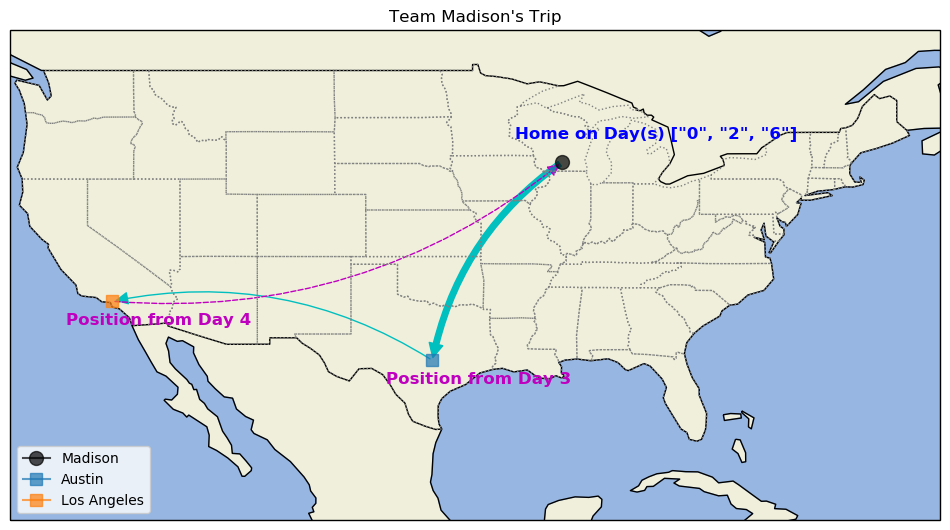

PyObject <matplotlib.legend.Legend object at 0xb7f466210>

In [19]:
##################################################################
# Update variable "team", to view it's path during the tournament
# if dataset == 1 (i.e. Big 10), choose from following:
# "Illinois"
# "Indiana"
# "Iowa" 
# "Maryland"
# "Michigan"
# "Michigan St."
# "Minnesota"
# "Nebraska" 
# "Northwestern"
# "Ohio St." 
# "Penn St." 
# "Purdue " 
# "Rutgers" 
# "Wisconsin" 
#----------------------------------------------------------------
# if dataset == 2 (i.e. FarAway), choose from following:
# "Madison" 
# "Los Angeles" 
# "Austin" 
# "New York"
# "Seattle"
# "Miami"
#----------------------------------------------------------------
# Default setting: Illinois [dataset 1], Madison [dataset 2]
##################################################################

if dataset == 1
    team = "Illinois"
else
    team = "Madison"
end

teamwise_map_greedy(NoOfTeams, d["Lat_data"], d["Lng_data"], Days, Loc, team, d["teams_dict"], Optimal, 
        d["Map_coord"])
#----------------------------------------------------------
# Interpreting the map
# Day '0' represents the starting position for the team
# Day 'k' represents the location and match day
#----------------------------------------------------------

### Function calls for Greedy Optimization - Single Round Robin

In [20]:
##############################################################################
# This cell solves greedy single round robin
###############################################################################

Loc = [""]
Loc, TravelCostData, NormValue = readfile_greedy(d["filename"], d["sheet"], d["TravelMat"], d["CityRange"], 
    NoOfTeams)

println("######################################################################")
println("SINGLE ROUND ROBIN")
println("######################################################################")
println()

@time Days, CostCalc, Optimal = GreedySRR(NoOfTeams, TravelCostData);


######################################################################
SINGLE ROUND ROBIN
######################################################################

Academic license - for non-commercial use only
Academic license - for non-commercial use only

Final Status: OPTIMAL

  0.404137 seconds (481.65 k allocations: 22.424 MiB, 3.10% gc time)


In [21]:
display_schedule_greedy(NoOfTeams, Days, Loc, CostCalc, Optimal, NormValue)

Number of Teams: 3
Greedy based Optimal Solution:
****************************************

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
TOURNAMENT SCHEDULE
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

Day 1: 
	 Team Los Angeles is at Austin
Day 2: 
	 Team Madison is at Austin
Day 4: 
	 Team Madison is at Los Angeles
****************************************
Total Cost = $208666.67


In [22]:
display_teamwise_schedule_greedy(NoOfTeams, Days, Loc, CostCalc, Optimal, NormValue)


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
TEAMWISE SCHEDULE
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

Team Madison
------------
Day 2
------------
Travels from Madison to Austin
Cost Incurred: 88333.33
------------
Day 4
------------
Travels from Austin to Los Angeles
Cost Incurred: 61666.67
----------------------------------------
Total Cost = $150000.00
****************************************
Team Los Angeles
------------
Day 1
------------
Travels from Los Angeles to Austin
Cost Incurred: 58666.67
------------
Day 4
------------
Travels from Austin to Los Angeles
Cost Incurred: 61666.67
----------------------------------------
Total Cost = $58666.67
****************************************
Team Austin
------------
Day 1
------------
Stays at Austin
------------
Day 2
------------
Stays at Austin
----------------------------------------
Total Cost = $0.00
****************************************
Total Tournament Cost = $208666.67


### Change here to view travel map for individual teams - Greedy

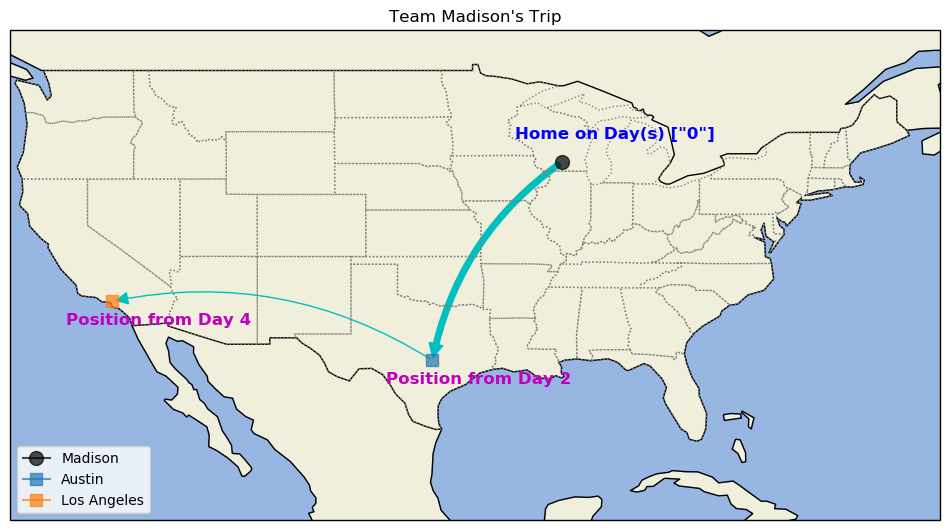

PyObject <matplotlib.legend.Legend object at 0xb81373b50>

In [23]:
##################################################################
# Update variable "team", to view it's path during the tournament
# if dataset == 1 (i.e. Big 10), choose from following:
# "Illinois"
# "Indiana"
# "Iowa" 
# "Maryland"
# "Michigan"
# "Michigan St."
# "Minnesota"
# "Nebraska" 
# "Northwestern"
# "Ohio St." 
# "Penn St." 
# "Purdue " 
# "Rutgers" 
# "Wisconsin" 
#----------------------------------------------------------------
# if dataset == 2 (i.e. FarAway), choose from following:
# "Madison" 
# "Los Angeles" 
# "Austin" 
# "New York"
# "Seattle"
# "Miami"
#----------------------------------------------------------------
# Default setting: Illinois [dataset 1], Madison [dataset 2]
##################################################################

if dataset == 1
    team = "Illinois"
else
    team = "Madison"
end

teamwise_map_greedy(NoOfTeams, d["Lat_data"], d["Lng_data"], Days, Loc, team, d["teams_dict"], Optimal, 
        d["Map_coord"])
#----------------------------------------------------------
# Interpreting the map
# Day '0' represents the starting position for the team
# Day 'k' represents the location and match day
#----------------------------------------------------------

## 6.B. Joint Optimization

In [24]:
##############################################################################
# CHANGE HERE to run the optimization on the provided dataset!
# -----------------------------
# EXPLAINATION: dataset defines the particular data to be used in optimization
# dataset = 1 --> Big 10 Data
# dataset = 2 --> FarAway Data
# NoOfTeams --> no. of teams in the tournament
###############################################################################
dataset = 2
NoOfTeams = 3

3

### Function calls for Joint Optimization - Double Round Robin

In [25]:
d = load_dataset(dataset)
Cost, Names = readfile(d["filename"], d["sheet"], d["TravelMat"], d["CityRange"])
Cost_norm = normalize_cost(Cost);

println()
println("######################################################################")
println("DOUBLE ROUND ROBIN")
println("######################################################################")
println()

Method = 1 #DRR
a, h, l, t, obj_val = solveJoint(NoOfTeams, Cost_norm, Method);


######################################################################
DOUBLE ROUND ROBIN
######################################################################

Academic license - for non-commercial use only
Academic license - for non-commercial use only
  1.441455 seconds (3.51 M allocations: 179.795 MiB, 3.46% gc time)

Final Status: OPTIMAL


In [26]:
display_schedule_joint(a, h, l, t, Names, Cost)
display_teamwise_schedule_joint(a, h, l, t, Names, Cost)

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
TOURNAMENT SCHEDULE
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

****************************************
Day 1| Daily Cost: $61666.67
----------------------------------------
Team Madison is at Madison
Team Los Angeles is at Los Angeles
Team Austin is at Los Angeles
~~~~~~~~~~~~~~~~~~~~~~
Matchup: 
Home team: Los Angeles
Away team: Austin
----------------------------------------
Day 2| Daily Cost: $139666.67
----------------------------------------
Team Madison is at Los Angeles
Team Los Angeles is at Los Angeles
Team Austin is at Austin
~~~~~~~~~~~~~~~~~~~~~~
Matchup: 
Home team: Los Angeles
Away team: Madison
----------------------------------------
Day 3| Daily Cost: $58666.67
----------------------------------------
Team Madison is at Austin
Team Los Angeles is at Los Angeles
Team Austin is at Austin
~~~~~~~~~~~~~~~~~~~~~~
Matchup: 
Home team: Austin
Away team: Madison
----------------------------------------
Day 4| Daily Cost: $135333.33
----

### Change here to view travel map for individual teams - Joint

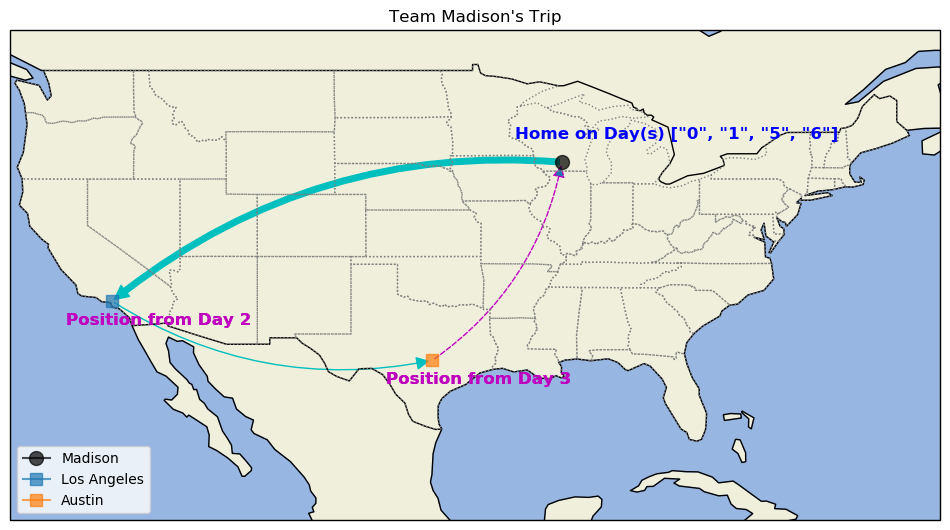

PyObject <matplotlib.legend.Legend object at 0xb7fb61b10>

In [27]:
##################################################################
# Update variable "team", to view it's path during the tournament
# if dataset == 1 (i.e. Big 10), choose from following:
# "Illinois"
# "Indiana"
# "Iowa" 
# "Maryland"
# "Michigan"
# "Michigan St."
# "Minnesota"
# "Nebraska" 
# "Northwestern"
# "Ohio St." 
# "Penn St." 
# "Purdue " 
# "Rutgers" 
# "Wisconsin" 
#----------------------------------------------------------------
# if dataset == 2 (i.e. FarAway), choose from following:
# "Madison" 
# "Los Angeles" 
# "Austin" 
# "New York"
# "Seattle"
# "Miami"
#----------------------------------------------------------------
# Default setting: Illinois [dataset 1], Madison [dataset 2]
##################################################################

if dataset == 1
    team = "Illinois"
else
    team = "Madison"
end

teamwise_map_joint(a, h, l, t, Names, d["Lat_data"], d["Lng_data"], team, d["teams_dict"], d["Map_coord"])
#----------------------------------------------------------
# Interpreting the map
# Day '0' represents the starting position for the team
# Day 'k' represents the present location
#----------------------------------------------------------

### Function calls for Joint Optimization - Single Round Robin

In [28]:
Cost, Names = readfile(d["filename"], d["sheet"], d["TravelMat"], d["CityRange"])
Cost_norm = normalize_cost(Cost);

println()
println("######################################################################")
println("SINGLE ROUND ROBIN")
println("######################################################################")
println()

Method = 2 #SRR
a, h, l, t, obj_val = solveJoint(NoOfTeams, Cost_norm, Method);


######################################################################
SINGLE ROUND ROBIN
######################################################################

Academic license - for non-commercial use only
Academic license - for non-commercial use only
  0.040384 seconds (13.00 k allocations: 689.969 KiB)

Final Status: OPTIMAL


In [29]:
display_schedule_joint(a, h, l, t, Names, Cost)
display_teamwise_schedule_joint(a, h, l, t, Names, Cost)

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
TOURNAMENT SCHEDULE
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

****************************************
Day 1| Daily Cost: $81000.00
----------------------------------------
Team Madison is at Los Angeles
Team Los Angeles is at Los Angeles
Team Austin is at Austin
~~~~~~~~~~~~~~~~~~~~~~
Matchup: 
Home team: Los Angeles
Away team: Madison
----------------------------------------
Day 2| Daily Cost: $58666.67
----------------------------------------
Team Madison is at Los Angeles
Team Los Angeles is at Austin
Team Austin is at Austin
~~~~~~~~~~~~~~~~~~~~~~
Matchup: 
Home team: Austin
Away team: Los Angeles
----------------------------------------
Day 3| Daily Cost: $58666.67
----------------------------------------
Team Madison is at Austin
Team Los Angeles is at Austin
Team Austin is at Austin
~~~~~~~~~~~~~~~~~~~~~~
Matchup: 
Home team: Austin
Away team: Madison
----------------------------------------
++++++++++++++++++++++++++++++
Total Cost = $1

### Teamwise Mapping Function Call - Joint

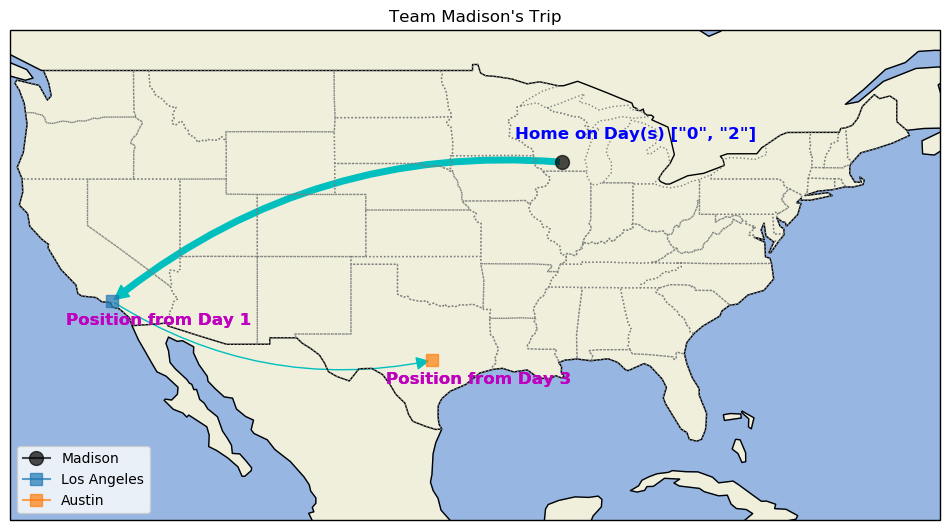

PyObject <matplotlib.legend.Legend object at 0xb800511d0>

In [30]:
##################################################################
# Update variable "team", to view it's path during the tournament
# if dataset == 1 (i.e. Big 10), choose from following:
# "Illinois"
# "Indiana"
# "Iowa" 
# "Maryland"
# "Michigan"
# "Michigan St."
# "Minnesota"
# "Nebraska" 
# "Northwestern"
# "Ohio St." 
# "Penn St." 
# "Purdue " 
# "Rutgers" 
# "Wisconsin" 
#----------------------------------------------------------------
# if dataset == 2 (i.e. FarAway), choose from following:
# "Madison" 
# "Los Angeles" 
# "Austin" 
# "New York"
# "Seattle"
# "Miami"
#----------------------------------------------------------------
# Default setting: Illinois [dataset 1], Madison [dataset 2]
##################################################################

if dataset == 1
    team = "Illinois"
else
    team = "Madison"
end

teamwise_map_joint(a, h, l, t, Names, d["Lat_data"], d["Lng_data"], team, d["teams_dict"], d["Map_coord"])
#----------------------------------------------------------
# Interpreting the map
# Day '0' represents the starting position for the team
# Day 'k' represents the present location
#----------------------------------------------------------

## 7. Solutions, Results and Discussion 

### Introduction to Results and Discussion

In our project, we have used two different optimization methodologies. In one of our cases, we are using a method that is referred to as the Greedy Optimization method. This varies from our other methodology Joint Optimization in a couple of keyways, and the results from these two methods are not always going to be the same.

First is the Greedy Optimization (G.O.) method. When using the G.O. method, we must optimize a model in an iterative manner. This means that the optimization model will make the best decision for that particular iteration (in our case, every day we optimize the problem). Ideally this will lead to a global minimum or maximum, but often times this is not the case. Choosing an optimal solution only depending on the current iteration can often lead to sub-optimal solutions. So why even use this technique? Well computationally speaking, this is an efficient way of finding a solution, if finding a sub-optimal solution is acceptable. Since this method is only calculating one small optimal solution for every iteration, the amount of computational power and subsequently time spent solving the problem is much smaller than other techniques. 

Second is the Joint Optimization (J.O.) method. The J.O. method makes a decision after taking into account the steps it should take in future as well as it has taken in past. In other words, J.O. solves the problem jointly by optimizing the matchups overall on all days, not just at every step which G.O. follows. J.O. is guaranteed to find a global minimum or maximum to the problem at hand. While a known global solution will be found, the amount of computational power and time required to solve J.O. problems is significantly greater than that of G.O.  

In real world applications, it’s important to prioritize what is most important, if locally optimal solutions will suffice, and computational agility/speed is more important, then the G.O. methodology may be the better of the two choices. If your computational ability is not as limited, then finding a globally satisfactory solution and sacrificing some computational time may point you in the direction of a J.O. methodology. 
 

### 7.A. Why should Joint be better than Greedy?

Let the Initial starting positions for 3 teams (*Illinois, Indiana, Iowa*) with their relative cost of travel (*6, 8, 11*) between them be as follows:

![title](Intuition_origins.png)

**The behavior of the 2 algorithms is illustrated below:**<br>

![title](Intuition_compare.png)

**Greedy Algorithm**<br>

As stated previously, this algorithm looks for the best possible (lowest cost) solution every day, its scope *does not* extend to all days of the tournament.<br>
> We see that on Day 1 *Illinois* travels to *Indiana*, as this is the lowest cost possible.

On Day 2, based on our constraints for the tournament, we see that the lowest cost possible is 11.
> Therefore on Day 2, *Illinois* travels to *Iowa*

On Day 3, we once again see that the lowest cost possible is 11
> Therefore on Day 3, *Indiana* travels to *Iowa*

**Joint Algorithm**<br>

The algorithm searches for the best possible (lowest cost) solution, by looking at the tournament and its cost *holistically*.<br>
Cost per day may be higher on some days, but this is necessary to ensure that the overall tournament cost is lower.<br>
> We see that on Day 1 *Iowa* travels to *Illinois*, even though this does not represnt the lowest cost possible for Day 1

> On Day 2, *Iowa* travels to *Indiana*

> On Day 3, *Indiana* travels to *Illinois*

We see from this illustration that, all though the Joint algorithm sacrificed the cost on *Day 1*, the overall cost over 3 days is significantly lower (*20 v/s 28: Joint v/s Greedy*)

### 7.B. Double Round Robin for 4 teams


#### 7.B.a. Greedy Approach

In this section of code, we solve a double round robin tournament for the first 4 cities in the "*FarAway*" dataset using the greedy mathematical model described in the above sections. Below, is a walkthrough of the code, followed by the code itself and finally, an analysis of the results.

The number of teams is chosen (4 for a more visual example), and the variables for total matches is determined based on the number of teams selected. 

We then define the constraints.

Now we get into the loop which does all of the optimization for us:

We iterate over days, which allows the model to pick which game should happen on each day, the tricky part is that we have to update the location and games played based on the day(s) previous. We start with the constriant that each team must start at their home, and that there must be a match played on the first day of the tournament (*makes sense!*). 

Each day we update the cost matrix, and the matches variable from the day pervious so that we have a continous tracker of what games have been played, which makes the optimization easier as the tournament goes on, since the number of game options decreases. 

Once we hit the third day of the tournament, we have to impose the constraint that teams cannot play more than two games in a row, this is to ensure that players get adequate rest and injuries are kept to a minumum while still finishing the tournament in a timely manner. 

We then hold these constraints until the number of days reaches the max number of days allowed, and we have our final results stored, which will be printed after our code, and analyzed in the next section!

In [31]:
# 
NoOfTeams = 4
dataset = 2 #FarAway
#------------------------------
if dataset == 1
    tourn = "BIG10"
else
    tourn = "FarAway"
end
d = load_dataset(dataset)
Loc, TravelCostData, NormValue = readfile_greedy(d["filename"], d["sheet"], d["TravelMat"], d["CityRange"], 
    NoOfTeams)

println("######################################################################")
println("GREEDY - DOUBLE ROUND ROBIN - ",NoOfTeams, " - TEAMS - ",tourn)
println("######################################################################")
println()

Days, CostCalc, Optimal = GreedyDRR(NoOfTeams, TravelCostData);
display_schedule_greedy(NoOfTeams, Days, Loc, CostCalc, Optimal, NormValue)
display_teamwise_schedule_greedy(NoOfTeams, Days, Loc, CostCalc, Optimal, NormValue)

######################################################################
GREEDY - DOUBLE ROUND ROBIN - 4 - TEAMS - FarAway
######################################################################

Academic license - for non-commercial use only
Academic license - for non-commercial use only

Final Status: OPTIMAL

Number of Teams: 4
Greedy based Optimal Solution:
****************************************

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
TOURNAMENT SCHEDULE
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

Day 1: 
	 Team New York is at Madison
Day 2: 
	 Team Madison is at Los Angeles
Day 4: 
	 Team Madison is at New York
Day 5: 
	 Team New York is at Los Angeles
Day 6: 
	 Team Los Angeles is at Madison
Day 7: 
	 Team Austin is at New York
Day 8: 
	 Team Los Angeles is at New York
Day 9: 
	 Team Madison is at Austin
Day 11: 
	 Team Austin is at Madison
Day 12: 
	 Team New York is at Austin
Day 13: 
	 Team Los Angeles is at Austin
Day 15: 
	 Team Austin is at Los Angeles
**********************

### Previous results used for analysis

In [32]:
#Output from a previously run set is shown here
f = open("DRR4_FarAway_Results_Greedy")
lines = readlines(f)
counter = 1
for l in lines
    println(l)
end

######################################################################
GREEDY - DOUBLE ROUND ROBIN - 4 TEAMS - FarAway
######################################################################

Academic license - for non-commercial use only
Academic license - for non-commercial use only

Final Status: OPTIMAL

Number of Teams: 4
Greedy based Optimal Solution:
****************************************

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
TOURNAMENT SCHEDULE
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

Day 1: 
	 Team New York is at Madison
Day 2: 
	 Team Madison is at Los Angeles
Day 4: 
	 Team Madison is at New York
Day 5: 
	 Team New York is at Los Angeles
Day 6: 
	 Team Los Angeles is at Madison
Day 7: 
	 Team Austin is at New York
Day 8: 
	 Team Los Angeles is at New York
Day 9: 
	 Team Madison is at Austin
Day 11: 
	 Team Austin is at Madison
Day 12: 
	 Team New York is at Austin
Day 13: 
	 Team Los Angeles is at Austin
Day 15: 
	 Team Austin is at Los Angeles
************************

Above we see the results in raw form, to make it easier to understand/analyze for yourself, see below:

|  Day      | Home Team         | Away Team  | 
| ------------- |-------------| -----| 
| 1 | New York | Madison |
| 2 | Madison | Los Angeles |
| 4 | Madison | New York |
| 5 | New York | Los Angeles |
| 6 | Los Angeles | Madison |
| 7 | Austin | New York |
| 8 | Los Angeles | New York | 
| 9 | Madison  | Austin |
| 11 | Austin | Madison|
| 12 | New York | Austin|
| 13 | Los Angeles | Austin |
| 15 | Austin | Los Angeles |

|        |  Team         | Cost Per Team  |
| ------------- |-------------| -----| 
| 1 | Madison | \$271,666.67 |
| 2 |  Los Angeles  | \$406,000.00 |
| 3 | Austin |  \$344,666.68 |
| 4 | New York |  \$385,333.34 |



The total amount of money spent on travel (*which is billed to the tournament host, which is why we want to minimize the travel cost in the first place*) is **\$1,407,666.69**

We can see that this is clearly *not* the global optimal solution when compared to the solution found in the section below. This is to be expected, since we know that the greedy method will find local, not necessarily global optimal solutions. 

Looking at our solution itself, we can see several things. We take 15 days, which is longer than the 12 which would be the expected number for a global optimal solution, which is the number of days that the joint double round robin solution took to complete the tournament. We can also see that there are less 'road-trips' and less 'home-stand' occurances. These are when a team plays multiple games on the road or at home in a row. We see at most, 2 games at home or on the road in a row. Keep in mind that this is a *double* round robin, so the fact that each team plays every other team once on the road and once at home will play a roll in this occurance. Compared to the single round robin where this restriction was not in place, thus we would see many more of these 'road-trips' and 'home-stands'. It is interesting to note though, that in the joint solution, we will see more of these 'road-trips' and 'home stands'.

Finally, we see that the amount of money spent on the total travel for the greedy solution is roughly 33% more than the solution found with the joint technique. Another expected result, but it is important to keep in mind that the computational time required for the joint solution was much higher than the computational time required for the greedy solution. 

#### 7.B.b. Joint Approach

**We are following the same rules and constraints as defined in the greedy section.**

As explained earlier in this report, the joint methodology gives us the known global optimum solution. This known optimial solution comes at a cost though. The amount of computing power required to get to this solution is much greater than the computing power required to get the local solution attained through the greedy method. 

Below, see the code used to calculate the joint optimal solution to the 4 team double round robin tournament:

In [33]:
################################################################
# Default showing for 3 teams as 4 will take around 20 mins.
################################################################
NoOfTeams = 3
dataset = 2 #FarAway
#------------------------------
if dataset == 1
    tourn = "BIG10"
else
    tourn = "FarAway"
end
d = load_dataset(dataset)
Cost, Names = readfile(d["filename"], d["sheet"], d["TravelMat"], d["CityRange"])
Cost_norm = normalize_cost(Cost);


println("######################################################################")
println("JOINT - DOUBLE ROUND ROBIN - ",NoOfTeams, " - TEAMS - ",tourn)
println("######################################################################")
println()

a, h, l, t, obj_val = solveJoint(NoOfTeams, Cost_norm, Method);
display_schedule_joint(a, h, l, t, Names, Cost)
display_teamwise_schedule_joint(a, h, l, t, Names, Cost)

######################################################################
JOINT - DOUBLE ROUND ROBIN - 3 - TEAMS - FarAway
######################################################################

Academic license - for non-commercial use only
Academic license - for non-commercial use only
  0.037953 seconds (13.00 k allocations: 689.969 KiB)

Final Status: OPTIMAL
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
TOURNAMENT SCHEDULE
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

****************************************
Day 1| Daily Cost: $81000.00
----------------------------------------
Team Madison is at Los Angeles
Team Los Angeles is at Los Angeles
Team Austin is at Austin
~~~~~~~~~~~~~~~~~~~~~~
Matchup: 
Home team: Los Angeles
Away team: Madison
----------------------------------------
Day 2| Daily Cost: $58666.67
----------------------------------------
Team Madison is at Los Angeles
Team Los Angeles is at Austin
Team Austin is at Austin
~~~~~~~~~~~~~~~~~~~~~~
Matchup: 
Home team: Austin
Away team

### Previous results used for analysis

In [34]:
#Output from a previously run set is shown here
f = open("DRR4_FarAway_Joint")
lines = readlines(f)
counter = 1
for l in lines
    println(l)
end

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
TOURNAMENT SCHEDULE
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

****************************************
Day 1| Daily Cost: $142666.67
----------------------------------------
Team Madison is at Los Angeles
Team Los Angeles is at Los Angeles
Team Austin is at Los Angeles
Team New York is at New York
~~~~~~~~~~~~~~~~~~~~~~
Matchup: 
Home team: Los Angeles
Away team: Austin
----------------------------------------
Day 2| Daily Cost: $86666.67
----------------------------------------
Team Madison is at Los Angeles
Team Los Angeles is at Los Angeles
Team Austin is at Los Angeles
Team New York is at Austin
~~~~~~~~~~~~~~~~~~~~~~
Matchup: 
Home team: Los Angeles
Away team: Madison
----------------------------------------
Day 3| Daily Cost: $58666.67
----------------------------------------
Team Madison is at Los Angeles
Team Los Angeles is at Los Angeles
Team Austin is at Austin
Team New York is at Austin
~~~~~~~~~~~~~~~~~~~~~~
Matchup: 
Home team: Aust

Above are the raw results of the joint optimization, for easier analysis, here is the optimal schedule in table form:


|  Day      | Home Team         | Away Team  | 
| ------------- |-------------| -----| 
| 1 | Los Angeles | Austin |
| 2 | Los Angeles | Madison |
| 3 | Austin | New York |
| 4 | Los Angeles | New York|
| 5 | Austin | Madison |
| 6 | Austin| Los Angeles | 
| 7 | Madison | New York | 
| 8 | Madison | Los Angeles |
| 9 | New York | Los Angeles|
| 10 | Madison | Austin|
| 11 | New York | Austin |
| 12 | New York | Madison |



|        |  Team         | Cost Per Team  |
| ------------- |-------------| -----| 
| 1 | Madison | \$39,333.33 |
| 2 |  Los Angeles  | \$174,666.67 |
| 3 | Austin |  \$236,333.33 |
| 4 | New York |  \$291,666.67 |

We can see that from this solution the total amount of money spent by the organization running the tournament is **\$958,333.33**. This value is about **30\%** less than the amount spent on travel as found by the greedy solution. The final schedule follows some trends that we've seen in different trails of this problem form. Teams that are farther away from others (cost-wise) will go on 'road-trips'. In this case, since this is a double round robin tournament, a team that is far away like New York will play it's road games all at once, so to save money, and then the remaining teams will all visit it in the latter half of the schedule. We could make the assumption that if this was going to be a single round robin tournament then we would probably see a team like New York play all of its games on the road, since it is the team furtherst away from the other cluster of teams.


>This behavior is also observed in the total cost incurred by each team for travel.


>As the travel cost is borne by the host and not the teams this split up of costs may be acceptable. Though the tournament can be made more fair in such scenarios by *minimizing* the total amount of money spent by each team, this will ensure that all teams have to travel approximately the same amount

#### 7.B.c. Travel Map per team: Greedy V/s Joint

Visually, it can be seen that the number of trips that a team has to take in Joint is less than that in Greedy!
![title](Head.png)
![title](Madison.png)
![title](LA.png)
![title](Austin.png)
![title](NewY.png)

### 7.C. Single Round Robin for 6 teams

#### 7.C.a. Greedy Approach
In this section of code, we solve a single round robin tournament for the first 6 universities in the Big 10 conference using the greedy mathematical model described in the above sections. Below, is a walkthrough of the code, followed by the code itself and finally, an analysis of the results.

The code utilizes three packages, the standard *JuMP* package, the mixed integer linear program (MILP) solver, *Gurobi*, and the package designed to read in Microsoft Excel files *XLSX*.

The number of teams is chosen (6 for this smaller and more visual example), and the variables for total matches per dayis determined based on the number of teams selected. In this instance, the max number of matches will be $30$ since $6*(6-1)=30$.

Next, we create our initial cost matrix, and ensure that it is of the correct demensions, again based on the number of teams participating in this version of the solver. We then grab the data from the Big 10 data file which contains the cost of travel to and from all 14 teams, (a 14x14 symmetrical matrix).

This cost is then normalized, and this data is put into our cost matrix for this particular problem, so we are only using the cost for the teams that we want. 

Now we can start to define our variables, first up is our match variable, which indicates who is playing where, and on what day, this three dimensional variable provides us with the scheduling information at the end of the optimization. These variables are binary, which indicates to us whether or not a match occured.

We then define three constraints which cover these five scenarios:

1) The number of matches that occur each day cannot exceed the value of the number of matches per day variable that was defined eariler. 

2) We cannot have more matches in the tournament than the value of the max matches defined earlier.

3) Each team can only play *one* game per day.

4) Once a specific matchup occurs, it will not repeat later in the tournament.

5) A team cannot play itself. 


We iterate over days, which allows the model to pick which game should happen on each day, the tricky part is that we have to update the location and games played based on the day(s) previous. We start with the constriant that each team must start at their home. 

Each day we update the cost matrix, and the matches variable from the day pervious so that we have a continous tracker of what games have been played, which makes the optimization easier as the tournament goes on, since the number of game options decrease. 

Once we hit the third day of the tournament, we have to impose the constraint that teams cannot play more than two games in a row, this is to ensure that players get adequate rest and injuries are kept to a minumum while still finishing the tournament in a timely manner. 

We then hold these constraints until the number of days reaches the max number of days allowed, and we have our final results stored, which will be printed after our code, and analyzed in the next section!

**DISCLAIMER: Due to the nature of the algorithm, there are multiple solutions, therefore the raw output may differ slightly from the analysis shown**

In [35]:
NoOfTeams = 6
dataset = 1 #Big 10
d = load_dataset(dataset)
Loc, TravelCostData, NormValue = readfile_greedy(d["filename"], d["sheet"], d["TravelMat"], d["CityRange"], 
    NoOfTeams)
#------------------------------
if dataset == 1
    tourn = "BIG10"
else
    tourn = "FarAway"
end
println("######################################################################")
println("GREEDY - SINGLE ROUND ROBIN - ",NoOfTeams, " - TEAMS - ",tourn)
println("######################################################################")
println()

Days, CostCalc, Optimal = GreedySRR(NoOfTeams, TravelCostData);
display_schedule_greedy(NoOfTeams, Days, Loc, CostCalc, Optimal, NormValue)
display_teamwise_schedule_greedy(NoOfTeams, Days, Loc, CostCalc, Optimal, NormValue)

######################################################################
GREEDY - SINGLE ROUND ROBIN - 6 - TEAMS - BIG10
######################################################################

Academic license - for non-commercial use only
Academic license - for non-commercial use only

Final Status: OPTIMAL

Number of Teams: 6
Greedy based Optimal Solution:
****************************************

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
TOURNAMENT SCHEDULE
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

Day 1: 
	 Team Maryland is at Michigan St.
Day 2: 
	 Team Illinois is at Indiana
Day 3: 
	 Team Michigan is at Iowa
Day 4: 
	 Team Illinois is at Iowa
Day 5: 
	 Team Indiana is at Michigan
Day 6: 
	 Team Illinois is at Maryland
Day 7: 
	 Team Michigan St. is at Indiana
Day 8: 
	 Team Illinois is at Michigan
Day 9: 
	 Team Iowa is at Maryland
Day 10: 
	 Team Illinois is at Michigan St.
Day 11: 
	 Team Michigan St. is at Michigan
Day 12: 
	 Team Michigan St. is at Iowa
Day 13: 
	 Team Indiana 

### Previous results used for analysis

In [36]:
#Output from a previously run set is shown here
f = open("SRR6_Big10_Results_Greedy")
lines = readlines(f)
counter = 1
for l in lines
    println(l)
end

######################################################################
GREEDY - SINGLE ROUND ROBIN - 6 TEAMS - BIG10
######################################################################

Academic license - for non-commercial use only
Academic license - for non-commercial use only

Final Status: OPTIMAL

Number of Teams: 6
Greedy based Optimal Solution:
****************************************

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
TOURNAMENT SCHEDULE
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

Day 1: 
	 Team Maryland is at Michigan St.
Day 2: 
	 Team Illinois is at Indiana
Day 3: 
	 Team Michigan is at Iowa
Day 4: 
	 Team Illinois is at Iowa
Day 5: 
	 Team Indiana is at Michigan
Day 6: 
	 Team Illinois is at Maryland
Day 7: 
	 Team Michigan St. is at Indiana
Day 8: 
	 Team Illinois is at Michigan
Day 9: 
	 Team Iowa is at Maryland
Day 10: 
	 Team Illinois is at Michigan St.
Day 11: 
	 Team Michigan St. is at Michigan
Day 12: 
	 Team Michigan St. is at Iowa
Day 13: 
	 Team Indiana is

Above we see the results in raw form, to make it easier to understand/analyze for yourself, see below:

|  Day      | Home Team         | Away Team  |
| ------------- |-------------| -----| 
| 1 | Michigan St. | Maryland |
| 2 |  Indiana  | Illinois |
| 3 | Iowa |  Michigan |
| 4 | Iowa |  Illinois |
| 5 | Michigan  | Indiana |
| 6 | Maryland  | Illinois |
| 7 | Indiana  | Michigan St. |
| 8 | Michigan | Illinois  |
| 9 | Maryland | Iowa  |
| 10 | Michigan St. | Illinois  |
| 11 | Michigan | Michigan St. |
| 12 | Iowa | Michigan St. |
| 13 | Iowa | Indiana |
| 14 | Michigan | Maryland |
| 16 | Indiana | Maryland |

|        |  Team         | Cost Per Team  |
| ------------- |-------------| -----| 
| 1 | Illinois | \$112,666.67 |
| 2 |  Indiana  | \$42,666.67 |
| 3 | Iowa |  \$38,333.33 |
| 4 | Maryland |  \$78,333.33 |
| 5 | Michigan  | \$27,000.00 |
| 6 | Michigan St.  | \$55,666.67 |


The total amount of money spent on travel (*which is billed to the tournament host, which is why we want to minimize the travel cost in the first place*) is **\$354,666.67**



Issues that could be improved in this model for future optimization could come in the form of number of home games required by each team. Traveling for games can be taxing, and gives the home team a certain advantage, if we implemented constraints that forced each team to have the same number of home games, this might give way to more even playing fields for each team. We can see in the table that teams like Illinois play 4 of their 5 games on the road, whereas a team like Iowa plays 4 of their 5 games at home. 


It clearly was important to track the location of each team, allowing teams to go on 'road trips' of multiple road games, which in the end saved the tournament host money for scheduling games. If each team were to go home after each game, the amount of money spend on travel would have been much larger, and the schedule would have probably looked much different. Since we know where each team is on any given day, we can then send teams to the closest opponenet that they haven't played yet, allowing us to help minimize that cost!

#### 7.C.b. Joint Approach

**We are following the same rules and constraints as defined in the greedy section.**

Using the Joint technique to solve this same problem expectedly yields a different result. As discussed in the beginning of this section, the greedy technique is not guaranteed to produce a globally optimal result. However, the computational resources required to complete this particular problem took upwards of 6 hours to complete. This is the price that accompanies finding what we know will be the globally optimal solution. Below is the code and raw results of the joint solution for a 6 team single round robin tournament:

In [37]:
################################################################
# Default showing for 4 teams as 6 will take around 20 mins.
################################################################
NoOfTeams = 4
Method = 2 #SRR
dataset = 1 #Big 10
#------------------------------
if dataset == 1
    tourn = "BIG10"
else
    tourn = "FarAway"
end
d = load_dataset(dataset)
Cost, Names = readfile(d["filename"], d["sheet"], d["TravelMat"], d["CityRange"])
Cost_norm = normalize_cost(Cost);

println()
println("######################################################################")
println("JOINT - SINGLE ROUND ROBIN - ",NoOfTeams, " - TEAMS - ",tourn)
println("######################################################################")
println()

a, h, l, t, obj_val = solveJoint(NoOfTeams, Cost_norm, Method);
display_schedule_joint(a, h, l, t, Names, Cost)
display_teamwise_schedule_joint(a, h, l, t, Names, Cost)


######################################################################
JOINT - SINGLE ROUND ROBIN - 4 - TEAMS - BIG10
######################################################################

Academic license - for non-commercial use only
Academic license - for non-commercial use only
  2.963196 seconds (52.58 k allocations: 2.634 MiB)

Final Status: OPTIMAL
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
TOURNAMENT SCHEDULE
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

****************************************
Day 1| Daily Cost: $17333.33
----------------------------------------
Team Illinois is at Illinois
Team Indiana is at Indiana
Team Iowa is at Illinois
Team Maryland is at Maryland
~~~~~~~~~~~~~~~~~~~~~~
Matchup: 
Home team: Illinois
Away team: Iowa
----------------------------------------
Day 2| Daily Cost: $45666.67
----------------------------------------
Team Illinois is at Indiana
Team Indiana is at Indiana
Team Iowa is at Illinois
Team Maryland is at Indiana
~~~~~~~~~~~~~~~~~~~~~~
Match

### Previous results used for analysis

In [38]:
#Output from a previously run set is shown here
f = open("SRR6_Big10_Results")
lines = readlines(f)
counter = 1
for l in lines
    println(l)
end

######################################################################
SINGLE ROUND ROBIN
######################################################################

Academic license - for non-commercial use only
Academic license - for non-commercial use only
30769.287479 seconds (378.65 k allocations: 20.400 MiB)

Final Status: OPTIMAL
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
TOURNAMENT SCHEDULE
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

****************************************
Day 1| Daily Cost: $55666.67
----------------------------------------
Team Illinois is at Illinois
Team Indiana is at Indiana
Team Iowa is at Illinois
Team Maryland is at Michigan
Team Michigan is at Michigan
Team Michigan St. is at Michigan
~~~~~~~~~~~~~~~~~~~~~~
Matchup: 
Home team: Michigan
Away team: Maryland
----------------------------------------
Day 2| Daily Cost: $10333.33
----------------------------------------
Team Illinois is at Illinois
Team Indiana is at Indiana
Team Iowa is at Illinois
Team Maryland 

~~~~
Travels from Maryland to Michigan
Cost incurred: $28000.00
----------------------------------
Day 2
~~~~
Travels from Michigan to Michigan St.
Cost incurred: $10333.33
----------------------------------
Day 3
~~~~
Stays at Michigan St.
----------------------------------
Day 4 [Match Day!]
~~~~
Stays at Michigan St.
----------------------------------
Day 5 [Match Day!]
~~~~
Travels from Michigan St. to Illinois
Cost incurred: $20333.33
----------------------------------
Day 6
~~~~
Stays at Illinois
----------------------------------
Day 7
~~~~
Stays at Illinois
----------------------------------
Day 8
~~~~
Stays at Illinois
----------------------------------
Day 9
~~~~
Stays at Illinois
----------------------------------
Day 10
~~~~
Stays at Illinois
----------------------------------
Day 11
~~~~
Stays at Illinois
----------------------------------
Day 12 [Match Day!]
~~~~
Travels from Illinois to Indiana
Cost incurred: $13333.33
----------------------------------
Day 13
~~~~
Stays

The results from this computationally taxing method are shown below:

|Day|Home Team|Away Team| Travel Cost|
|----|----|----|----|
|1 |Michigan  |Maryland  |\$55666.67  |
|2 |Illinois  |Iowa  |\$10333.33  |
|3 |Michigan  |Michigan St.  |\$0  |
|4 |Michigan St. |Maryland  |\$10333.33  |
|5 |Illinois  |Maryland  |\$20333.33  |
|6 |Indiana  |Iowa  |\$13333.33  |
|7 |Indiana  |Illinois  |\$33333.33  |
|8 |Michigan  |Illinois  |\$20000  |
|9 |Michigan  |Iowa  |\$10333.33 |
|10 |Michigan St.  |Illinois  |\$0  |
|11 |Michigan St.  |Iowa  |\$10333.33  |
|12 |Indiana  |Maryland  |\$13333.33  |
|13 |Michigan  |Indiana  |\$20000  |
|14 |Michigan St.  |Michigan  |\$10333.33  |
|15 |Michigan St.  |Indiana  |\$10333.33  |

|        |  Team         | Cost Per Team  |
| ------------- |-------------| -----| 
| 1 | Illinois | \$43,666.67 |
| 2 |  Indiana  | \$30,333.33 |
| 3 | Iowa |  \$61,000.00 |
| 4 | Maryland |  \$72,00.00 |
| 5 | Michigan  | \$10,333.33 |
| 6 | Michigan St.  | \$20,666.67 |

The total cost spent on travel for all teams comes out to be **\$238,000**. When compared to the total travel cost found in the greedy analysis, we see that the joint solution is roughly **67%** of the greedy solution. 

We can also see some more streaks of home games and away games for teams. This was not someting we say in the greedy results. Intuitively, it would make sense financially to stay at home for a few games or keep traveling on the road for a few games, rather than travel to and from home for every game. So the results with the globally optimal solution also line up with that inuition. 

Unlike what we will see in the differences between the greedy and joint solutions for the double round robin tournament, these two solutions take the same number of days. However, it is important to note that the travel cost is always $>0$ in the greedy solution. In the joint solution, there are several instances where the teams are already in the correct locations and there is not travel cost incurred on that particular day. 

Again, it is important to emphasize the trade-off we are seeing here. The greedy solution is about twice as expensive, but the computational power required to solve the is much greater than the former ratio. In a real life scenario, it might not be worth it to tax any computational resources in this extreme way. 

### 7.D. Performance Analysis 

#### 7.D.a. Greedy V/s Joint
Following graph shows the trend in both the algorithms as number of teams increases.
![title](PerformanceGraph.png)
NOTE: The y-axis (time) is in log-scale.

#### 7.D.b. How did we improve the time taken by Joint Optimization?

**Normalization**<br>
Arbitrary large decimal cost (which is what really is the case) causes the performance to suffer in terms of time, when solved by Mixed Integer Solver. On the other hand, low integer cost is often desirable in reducing the computation time. <br>
> We normalized our data to be in between $[0-100]$, while preserving their relative distance. Let $C_n[i,j]$ be the normalized cost at $(i,j)$ location, $C[i,j]$ be the original cost at $(i,j)$ location, and $C_{max}$ be the maximum cost in the whole matrix. Also, $[\cdot]$ denote an integer function. Then, 
$$C_n[i,j] = \Big[\frac{C[i,j]}{C_{max}}*100\Big]$$ 

**McCormick Relaxation**<br>

Bilinear terms in the optimization problem makes it non-linear. It is usually difficult for a solver to solve these bilinear terms. McCormick relaxations introduces new variables and constraints and relaxes a non-convex problem into a convex problem.<br>
> We see that when the number of decision variables are less (as in the case of DRR, 3/4 teams) the improvement seen due to McCormick Relaxation isn't very significant. But as the number of decision variables increases exponentially (for 5 teams it is nearly 4000) introducing McCormick relaxation provides the speedup upto 3X ! (From 25 mins to 8 mins).

**Caching Issues**<br>

It's recommended to have largest iterate deep inside the nested for loops. <br>
> For us, largest iterate is k which is running from 1 to N(N-1). When we keep k as the innermost loop, we see the performance improvement by 2X ! (From 61 mins to 28 mins for SRR, Joint, 6 teams).

### Following graph shows speedup obtained in SRR Joint optimization
![title](PerformanceGraphMcCormic.png)
NOTE: The y-axis (time) is in log-scale.

### 7.E. Full Big 10 Greedy Solution

Finally, we wanted to run our scheduling problem with all 14 teams in the Big 10, and compare the resulting schedule with the actual schedule used by the Big 10 this season. Since for both Men's and Women's basketball, the Big 10 uses a double round robin as its scheduling technique for the regualar season, this is a good check to see how our model matches up to a real life scenario with results that we can actually check. We simply lacked the computational power to test the joint methodology against the real Big 10 schedule. Since running the joint optimization for a single round robin tournament of 6 teams takes roughly 1-2 hours, imagine the computing time for a 14 team double round robin schedule!

Since comparing every game played in an entire conference schedule would be hard to compare side by side, we will focus on the individual schedule of *our* Wisconsin Badgers! Below are our results using the greedy method for the Big 10 basketball schedule:

 | Match      | Home Team         | Away Team  | Day |
| ------------- |-------------| -----| ---- |
| 1 | Wisconsin | Northwestern | 5 |
| 2 | Wisconsin | Iowa | 7 |
| 3 | Minnesota | Wisconsin | 16 |
| 4 | Michigan St. | Wisconsin | 35 |
| 5 | Maryland | Wisconsin | 43 |
| 6 | Penn St. | Wisconsin | 48 |
| 7 | Ohio St. | Wisconsin | 56 |
| 8 | Michigan | Wisconsin | 69 |
| 9 | Northwestern  | Wisconsin | 70 |
| 10 | Wisconsin | Minnesota | 72 |
| 11 | Wisconsin | Michigan | 74 |
| 12 | Wisconsin | Nebraska | 77|
| 13 | Wisconsin | Penn St. | 79 |
| 14| Wisconsin | Rutgers | 81 |
| 15 | Wisconsin | Michigan St. | 83 |
| 16 | Wisconsin | Ohio St. | 85 |
| 17 | Wisconsin | Purdue | 87 |
| 18 | Purdue | Wisconsin | 93 |
| 19 | Iowa | Wisconsin | 97 |
| 20 | Wisconsin | Illinois | 110 |
| 21 | Wisconsin  | Indiana | 112 |
| 22 | Wisconsin | Maryland | 118 |
| 23 | Illinois | Wisconsin | 120 |
| 24 | Indiana | Wisconsin | 131 |
| 25 | Rutgers | Wisconsin | 167 |
| 26 | Nebraska | Wisconsin | 177 |

Now compare with the actual schedule the Wisconsin Men's Basketball team played in the Big 10 this year:

 | Match      | Home Team         | Away Team  |
| ------------- |-------------| -----|
| 1 | Wisconsin | Indiana | 
| 2 | Rutgers | Wisconsin |
| 3 | Ohio St. | Wisconsin | 
| 4 | Wisconsin | Illinois |
| 5 | Penn St. | Wisconsin |
| 6 | Wisconsin | Maryland | 
| 7 | Michigan St. | Wisconsin | 
| 8 | Wisconsin | Nebraska | 
| 9 | Purdue  | Wisconsin |
| 10 | Iowa | Wisconsin | 
| 11 | Wisconsin | Michigan St. |
| 12 | Minnesota | Wisconsin |
| 13 | Wisconsin | Ohio St. |
| 14| Nebraska | Wisconsin |
| 15 | Wisconsin | Purdue | 
| 16 | Wisconsin | Rutgers | 
| 17 | Michigan | Wisconsin | 
| 18 | Wisconsin | Minnesota |
| 19 | Wisconsin | Northwestern |
| 20 | Indiana | Wisconsin | 

The first key difference you may notice is the number of games. Well this can be attributed to a number of canceled games via COVID concerns. But another difference is the long home and away game streaks that we saw in our results. These are much less prevalent in the actual schedule that we pulled. A reason for this might be a ticket sales perspective. One would think that fans would grow weary from long stretches of time of the team not being in town. It might be more profitable to spend more money on travel while selling more tickets with alternating or nearly alternating home/away games. This format also gives the student athletes more time in their home city to rest and catch up on classes. 

Something else to note, in our double round robin schedule, we forced the tournament to only have a single game per day. In reality, the Big 10 plays anywhere from 3 to 5 games in a single day, which allows the conference season to be much shorter than our model would suggest. With the constraint that only a single game can be played in a day, the double round robin tournament takes over 180 days, which simply doesn't fit into the NCAA's timeframe. To make this model more real-life applicable, multiple games could be permitted to be played on the same day.

## 8. Summary 

> **Joint Optimization is the best approach to solve this problem as it finds the global minimum. Our results prove this fact. It can be run for large number of teams in reasonable time as long as hardware permits.**

> **On an average, we see 30% improvement (in terms of cost) in Joint as compared to Greedy approach.**

To conclude, this project has shown that real life application of a simple high-level concept can in fact require a great deal of thought and computational power to achive optimal results. Comparing two different methodologies of solving these advanced scheduling problems has shown the pros and cons of each approach. In real life, speed with pretty good accuracy can often be king. However, we’ve shown why getting the globally optimal solution can be that much more meaningful. It’s meaningful because it’s hard. The computing power and mathematical models required to achive the true optimal solution make finding the sure-fire solution that much more meaningful. 

In reality, a companies resources come first, and whether those resources get put into the computational solving power, or in the detail of the model, there can always be improvements. In our case, it would serve the model better to have more constraints that dictate the rules of the tournament itself. We saw in the single round robin results that some teams were forced to play the vast majority of their games on the road, further testing with more teams should be performed to see if this trend continues and how using teams with more geographic distance between them are impacted. This was less of an issue with the double round robin since the two game rule of this schedule eliminates this option. Since single round robin tournaments are used in many different sports, using a required number of home game constraint might help to create a more even playing field with regard to team travel. 

It would be interesting to use this similar minimum cost model to try and pick the best city to host a tournament as well. In this scenario, we would want all the teams to convene on a single host city or cities (much like what happens for the Olympics of the FIFA Men’s and Women’s World Cups). Finding the right city or cities would be best to minimize the cost for each team to travel to participate in the tournament could add an interesting twist and make these models more applicaple to other tournaments in the real world. 


# Appendix

### A.1. Multiple matches per day : Greedy Algorithm (Double Round Robin)

By increasing the total number of matches allowed per day and the Total duration of the tournament (Line 12 - 13), we were able to obtain the following solution:

In [39]:
#Output from a previously run set is shown here
f = open("DRR14_Big10_Results_Greedy")
lines = readlines(f)
counter = 1
for l in lines
    println(l)
end

######################################################################
DOUBLE ROUND ROBIN
######################################################################

Academic license - for non-commercial use only
Academic license - for non-commercial use only

Final Status: OPTIMAL

  7.050364 seconds (2.19 M allocations: 126.656 MiB, 0.28% gc time)
Number of Teams: 14
Greedy based Optimal Solution:
****************************************

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
TOURNAMENT SCHEDULE
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

Day 1: 
	 Team Illinois is at Minnesota
Day 1: 
	 Team Indiana is at Maryland
Day 2: 
	 Team Michigan is at Illinois
Day 3: 
	 Team Nebraska is at Maryland
Day 4: 
	 Team Illinois is at Michigan
Day 4: 
	 Team Michigan St. is at Iowa
Day 4: 
	 Team Penn St. is at Ohio St.
Day 4: 
	 Team Rutgers is at Minnesota
Day 5: 
	 Team Illinois is at Michigan St.
Day 5: 
	 Team Maryland is at Minnesota
Day 6: 
	 Team Illinois is at Indiana
Day 6: 
	 Team Nebraska

Total Cost = $404000.00
****************************************
Team Indiana
------------
Day 1
------------
Travels from Indiana to Maryland
Cost Incurred: 32333.33
------------
Day 6
------------
Travels from Maryland to Indiana
Cost Incurred: 13333.33
------------
Day 8
------------
Stays at Indiana
------------
Day 9
------------
Stays at Indiana
------------
Day 11
------------
Stays at Indiana
------------
Day 14
------------
Stays at Indiana
------------
Day 20
------------
Travels from Indiana to Michigan
Cost Incurred: 52666.67
------------
Day 28
------------
Travels from Michigan to Northwestern
Cost Incurred: 31000.00
------------
Day 30
------------
Travels from Northwestern to Indiana
Cost Incurred: 53000.00
------------
Day 31
------------
Stays at Indiana
------------
Day 37
------------
Travels from Indiana to Rutgers
Cost Incurred: 74666.67
------------
Day 38
------------
Travels from Rutgers to Indiana
Cost Incurred: 32333.33
------------
Day 40
------------
Stays 

Cost Incurred: 32333.33
------------
Day 61
------------
Travels from Illinois to Minnesota
Cost Incurred: 28000.00
------------
Day 63
------------
Travels from Minnesota to Michigan St.
Cost Incurred: 40666.67
------------
Day 76
------------
Stays at Michigan St.
------------
Day 84
------------
Travels from Michigan St. to Northwestern
Cost Incurred: 15666.67
------------
Day 88
------------
Travels from Northwestern to Michigan St.
Cost Incurred: 15666.67
------------
Day 92
------------
Stays at Michigan St.
------------
Day 93
------------
Stays at Michigan St.
------------
Day 96
------------
Stays at Michigan St.
------------
Day 97
------------
Travels from Michigan St. to Rutgers
Cost Incurred: 33666.67
----------------------------------------
Total Cost = $456000.00
****************************************
Team Minnesota
------------
Day 1
------------
Stays at Minnesota
------------
Day 4
------------
Stays at Minnesota
------------
Day 5
------------
Stays at Minnesota
--

Travels from Northwestern to Penn St.
Cost Incurred: 76666.66
------------
Day 22
------------
Stays at Penn St.
------------
Day 33
------------
Travels from Penn St. to Iowa
Cost Incurred: 35333.33
------------
Day 36
------------
Travels from Iowa to Michigan St.
Cost Incurred: 35666.67
------------
Day 40
------------
Travels from Michigan St. to Penn St.
Cost Incurred: 55666.67
------------
Day 42
------------
Travels from Penn St. to Nebraska
Cost Incurred: 16166.67
------------
Day 44
------------
Travels from Nebraska to Penn St.
Cost Incurred: 76000.00
------------
Day 46
------------
Stays at Penn St.
------------
Day 54
------------
Travels from Penn St. to Purdue 
Cost Incurred: 30333.33
------------
Day 57
------------
Travels from Purdue  to Minnesota
Cost Incurred: 60333.33
------------
Day 60
------------
Travels from Minnesota to Rutgers
Cost Incurred: 33000.00
------------
Day 63
------------
Travels from Rutgers to Penn St.
Cost Incurred: 48333.33
------------
Day 68

>From this we see that, we are able to easily update the constraints to suit the needs of individual tournaments from our initial algorithm

### A.2. Peer Review Feedback: Cost of staying at away location : Joint Algorithm (Double Round Robin)

In the current implementation we see that the teams do not travel back to home location between matches as this would incur additional travel costs, but this does not represent a real scenario as staying in hotels would introduce more expenditures to the team than is necessary, thus we can update the algorithm to consider the cost of teams staying at *away* locations.

The Objective function will be updated as follows:
>**@objective** (m, Min, sum( ($Cost[s,d] \ * \ t[s,d,i,k] + sum(Stay[i,1:n] \ .* \ l[i,:,k])/100$) for s = 1:n, d = 1:n, i = 1:n, k = 1:N))

We see from the output that the teams opt to travel back home after their matches rather than stay away if they do not have consecutive away matches.

In [40]:
#Output from a previously run set is shown here
f = open("DRR4_FarAway_Joint_Stay")
lines = readlines(f)
counter = 1
for l in lines
    println(l)
end

######################################################################
DOUBLE ROUND ROBIN
######################################################################

Academic license - for non-commercial use only
Academic license - for non-commercial use only
 14.631943 seconds (126.61 k allocations: 6.857 MiB)

Final Status: OPTIMAL
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
TOURNAMENT SCHEDULE
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

****************************************
Day 1| Daily Cost: $39333.33
----------------------------------------
Team Madison is at New York
Team Los Angeles is at Los Angeles
Team Austin is at Austin
Team New York is at New York
~~~~~~~~~~~~~~~~~~~~~~
Matchup: 
Home team: New York
Away team: Madison
----------------------------------------
Day 2| Daily Cost: $144666.67
----------------------------------------
Team Madison is at Madison
Team Los Angeles is at Austin
Team Austin is at Austin
Team New York is at New York
~~~~~~~~~~~~~~~~~~~~~~
Matchup: 
Home team

# THE END :-)